In [1]:
## Check the optimal location of STRB2

# 1 - Graph average waveforms for original settings
# 2 - Graph average waveform for each step
# 3 - Zoom in on glitches
# 4 - Graph the value of each average waveform at 22, 56, 75, and 90 
# 5 - Graph value of each waveform for only Even Blocks
# 6 - Graph value of each waveform for only Odd Blocks

# Conclusion - The best STRB2 window seems to be 0-10

In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import os.path

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Setting plot default sizes
plt.rc('axes', titlesize = 40)
plt.rc('axes', labelsize = 30)
plt.rc('xtick', labelsize = 20)
plt.rc('ytick', labelsize = 20)
plt.rc('legend', fontsize = 20)
plt.rc('figure', titlesize = 40)
plt.figure(figsize(12,9))

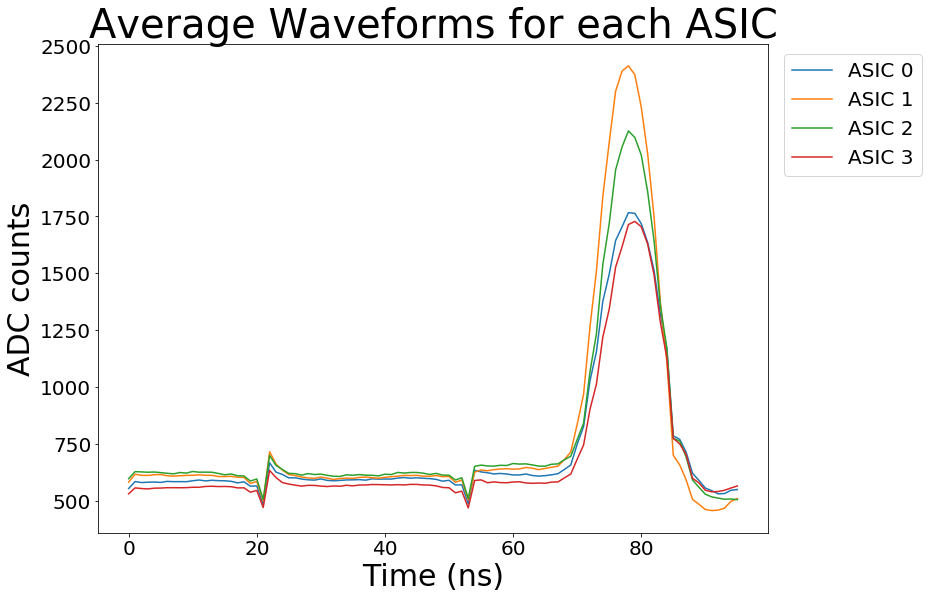

In [4]:
# Graph average waveforms for original settings

Original = []
for ASIC in range(4):
    data = np.loadtxt("/users/wipacuser/Desktop/CTA/Runs/ASIC Initialization Scans/STRB2 Location/sampleFileLarge_run320342ASIC" + str(ASIC) + "CH6.txt") 
    waveforms = []
    for event in range(5000):
        phase = int(data[event][4])
        shift = 32 - phase - 1 + 16*(phase>=16) - 16*(phase<16)
        waveforms.append(data[event][shift: (shift + 96)])
    avg_waveform = []
    for point in range(96):
        a = []
        for event in range(5000):
            a.append(waveforms[event][point])
        avg_waveform.append(np.mean(a))
    Original.append(avg_waveform)
    plt.plot(avg_waveform, label = 'ASIC ' + str(ASIC))
plt.title('Average Waveforms for each ASIC')
plt.ylabel('ADC counts')
plt.xlabel('Time (ns)')
plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
plt.show()

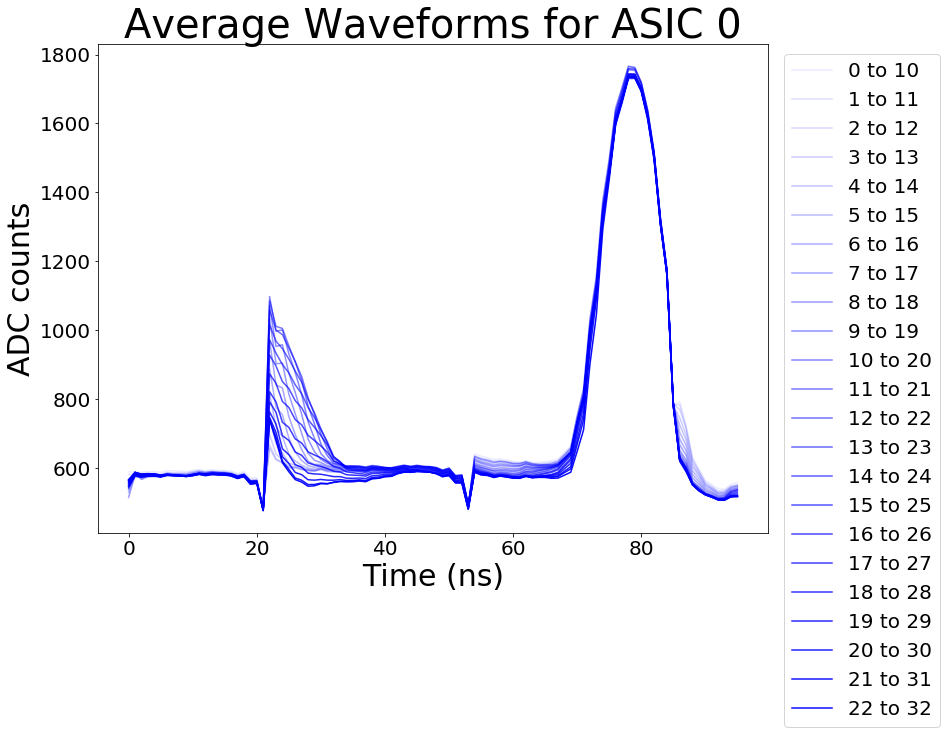

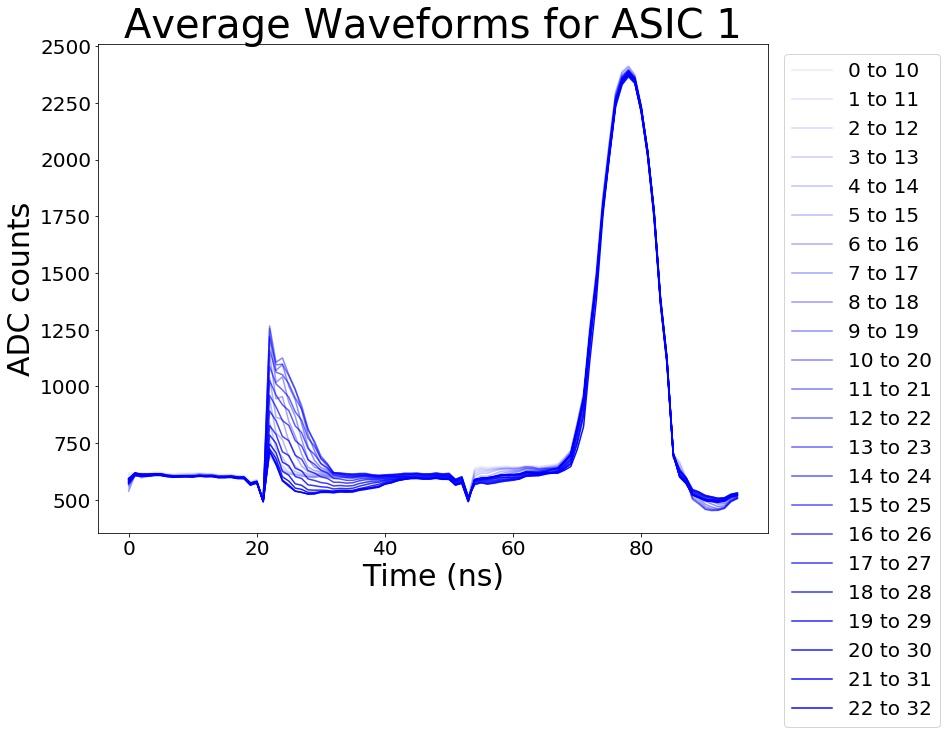

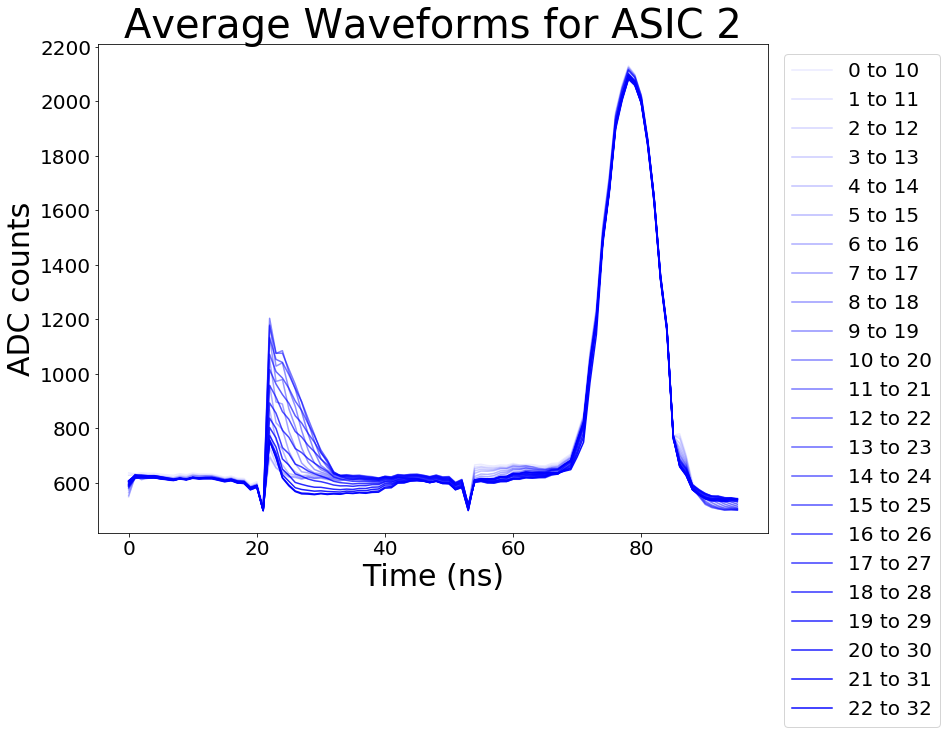

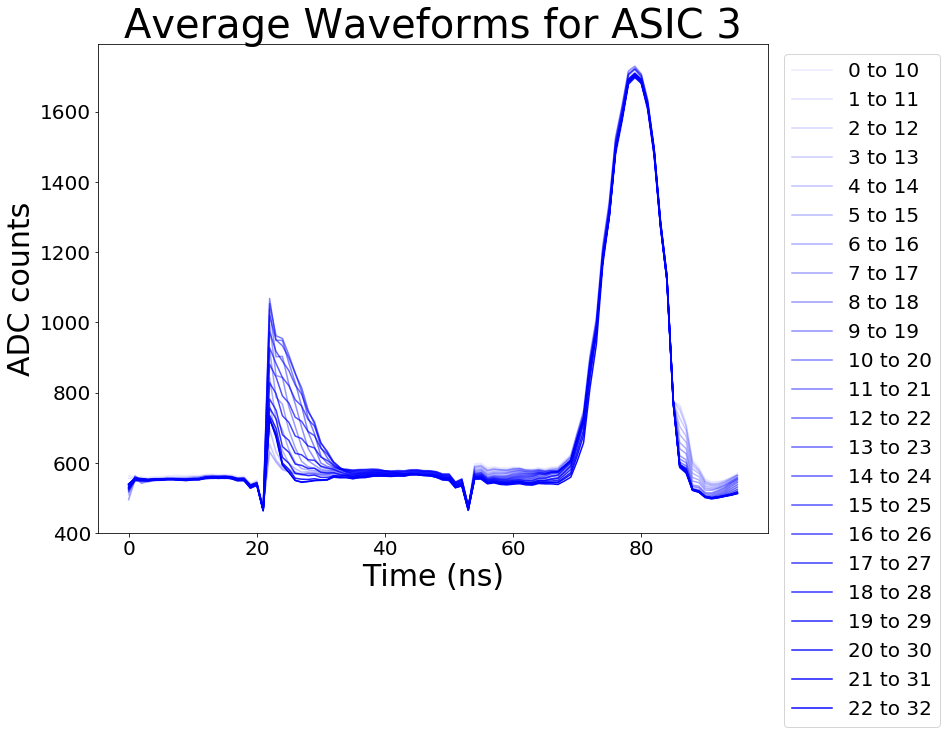

In [4]:
# Graph average waveform for each step

STRB2 = []
for ASIC in range(4):
    runs = []
    start_value = 0
    color = 0.08
    for run in range(320340,320363):
        data = np.loadtxt("/users/wipacuser/Desktop/CTA/Runs/ASIC Initialization Scans/STRB2 Location/sampleFileLarge_run" + str(run) + "ASIC" + str(ASIC) + "CH6.txt")
        waveforms = []
        for event in range(5000):
            phase = int(data[event][4])
            shift = 32 - phase - 1 + 16*(phase>=16) - 16*(phase<16)
            waveforms.append(data[event][shift: shift+96])
        avg_waveform = []
        for point in range(96):
            a = []
            for event in range(5000):
                a.append(waveforms[event][point])
            avg_waveform.append(np.mean(a))
        runs.append(avg_waveform)
        plt.plot(avg_waveform, label = str(start_value) + ' to ' + str(start_value + 10), color = 'b', alpha = color)
        start_value = start_value + 1
        color = color + 0.04
    STRB2.append(runs)
    plt.title('Average Waveforms for ASIC ' + str(ASIC))
    plt.ylabel('ADC counts')
    plt.xlabel('Time (ns)')
    plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
    plt.show()

In [25]:
print(shape(STRB2))

(4, 23, 96)


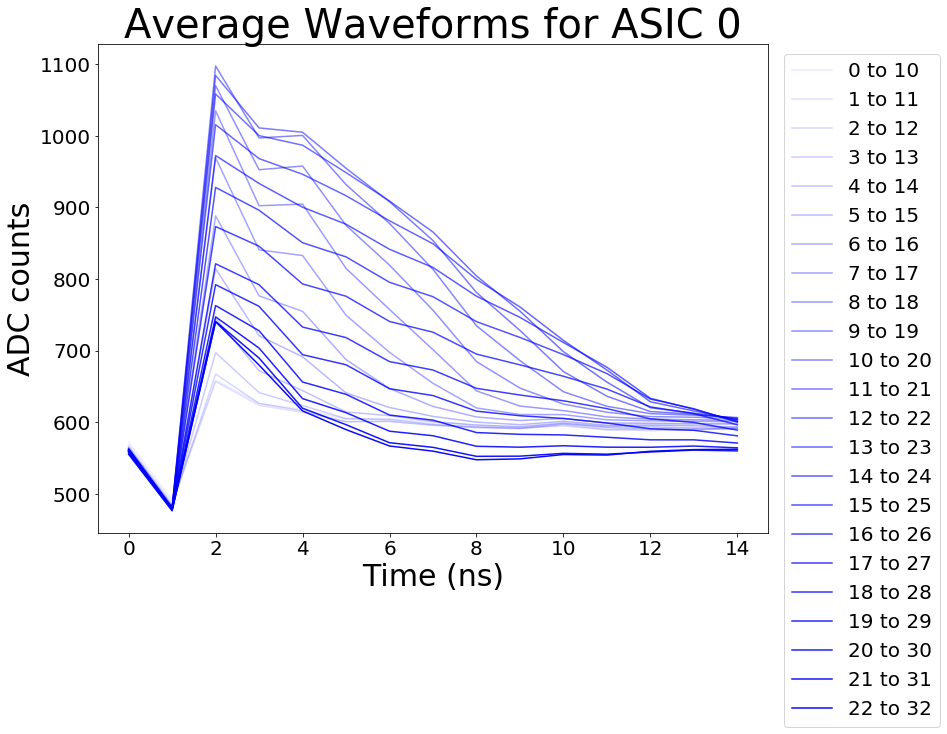

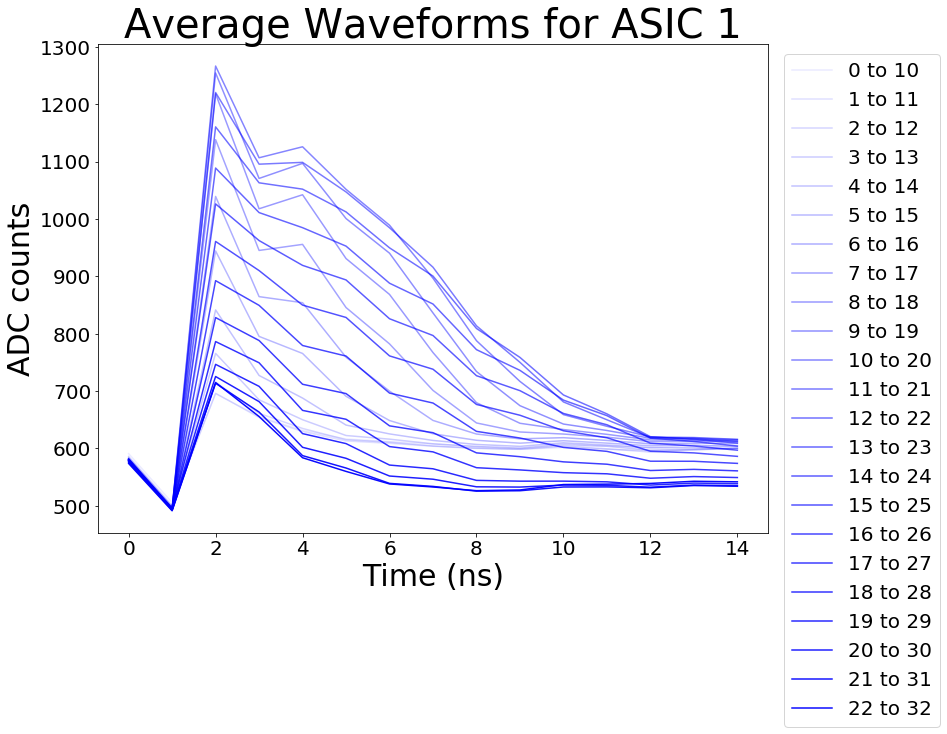

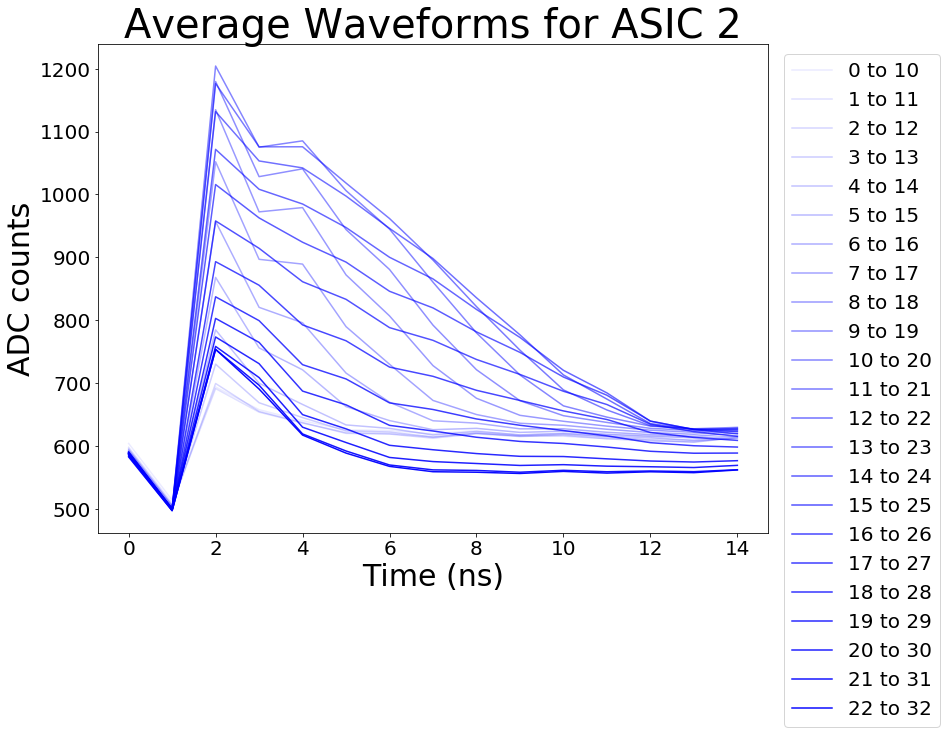

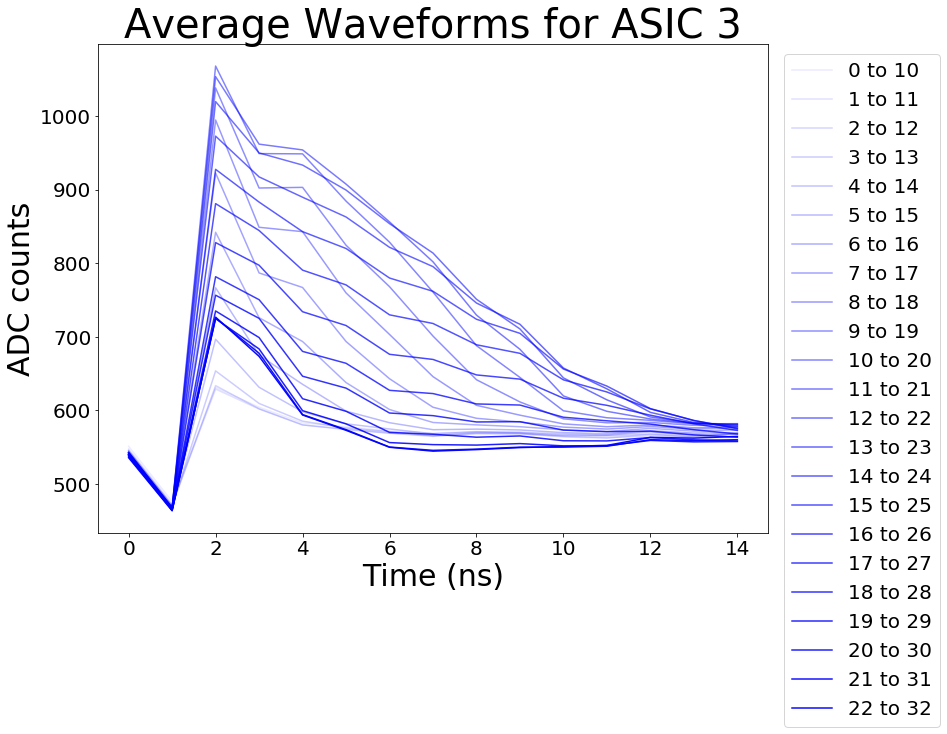

In [7]:
# Zoom in on glitch

for ASIC in range(4):
    start_value = 0
    color = 0.08
    for run in range(23):
        plt.plot(STRB2[ASIC][run][20:35], label = str(start_value) + ' to ' + str(start_value + 10), color = 'b', alpha = color)
        start_value = start_value + 1
        color = color + 0.04
    plt.title('Average Waveforms for ASIC ' + str(ASIC))
    plt.ylabel('ADC counts')
    plt.xlabel('Time (ns)')
    plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
    plt.show()

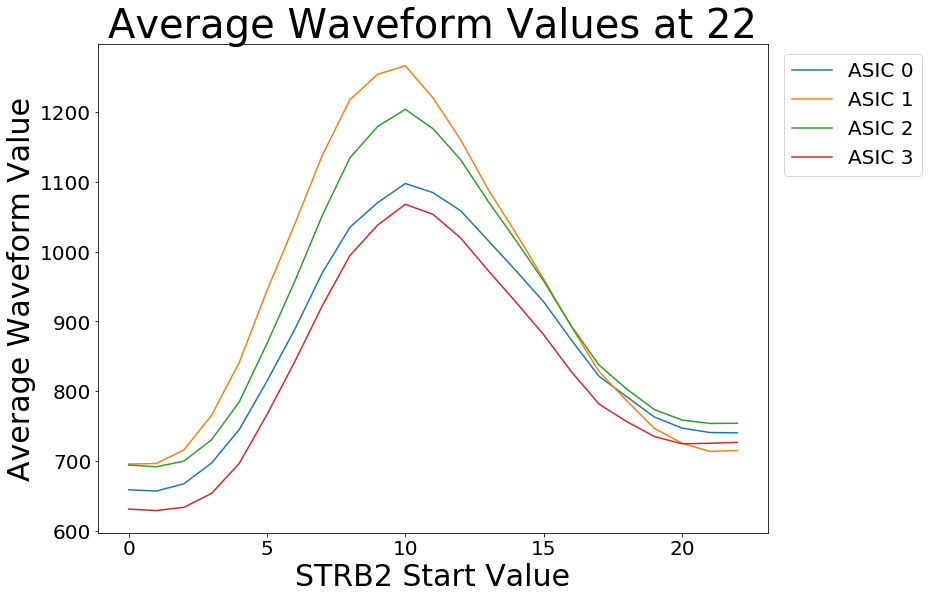

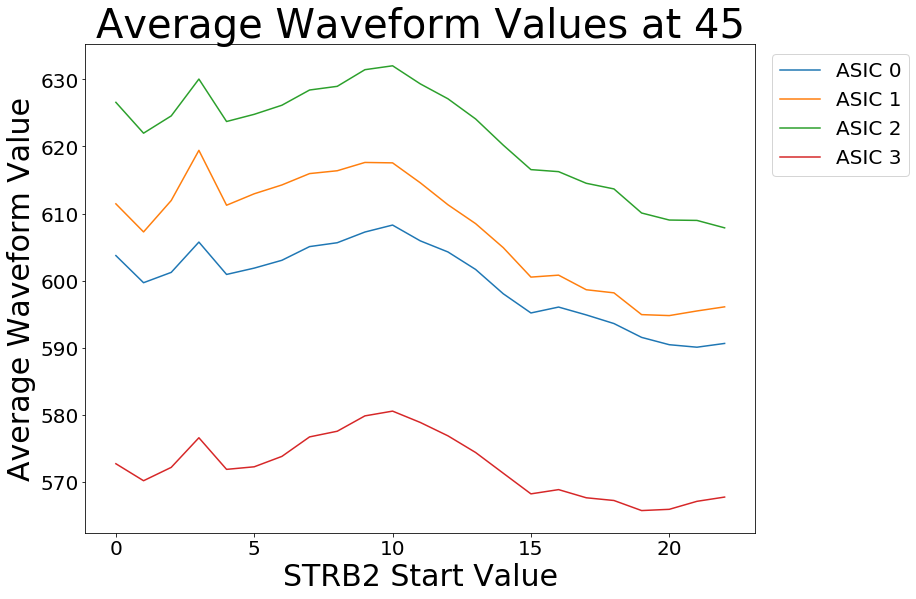

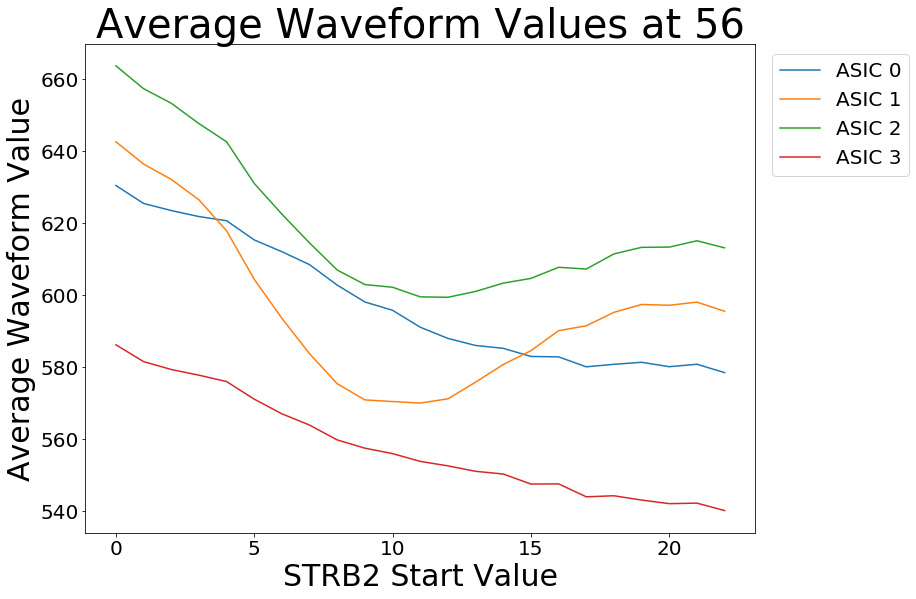

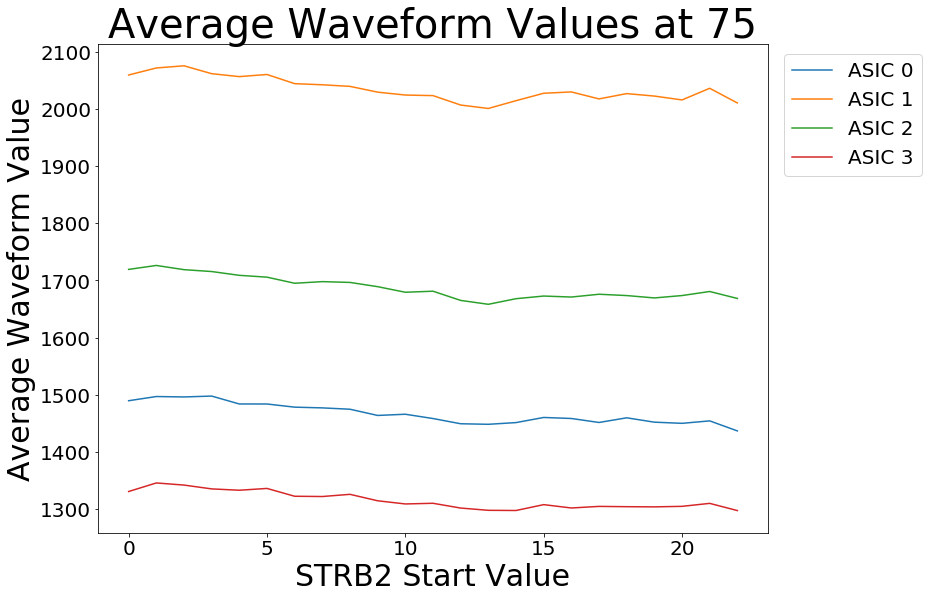

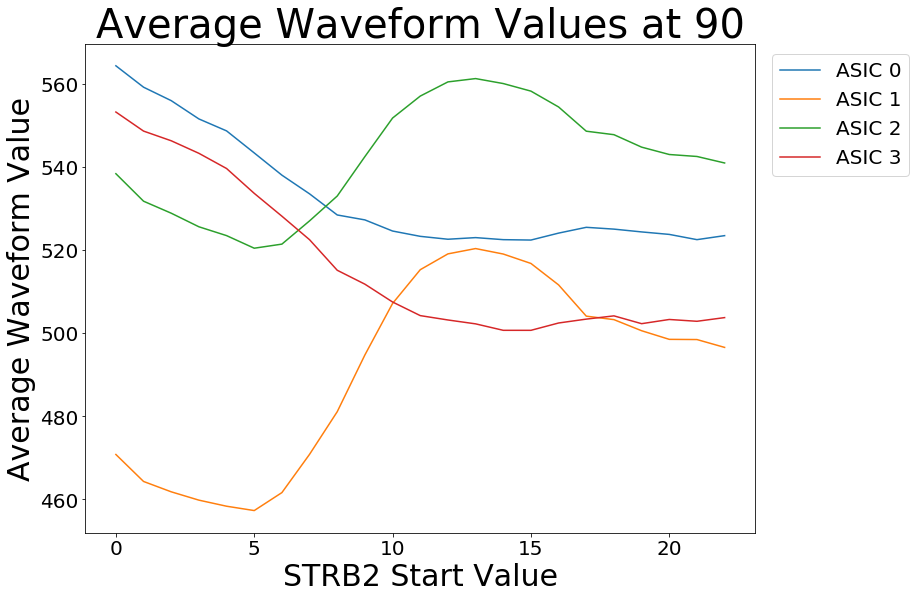

In [8]:
# Graph the value of each average waveform at 22, 56, 75, and 90.
start = [i for i in range(23)]

# at value 22
for ASIC in range(4):
    value = []
    for run in range(23):
        value.append(STRB2[ASIC][run][22])
    plt.plot(start,value, label = 'ASIC ' + str(ASIC))
plt.title('Average Waveform Values at 22')
plt.xlabel('STRB2 Start Value')
plt.ylabel('Average Waveform Value')
plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
plt.show()

# at value 45
for ASIC in range(4):
    value = []
    for run in range(23):
        value.append(STRB2[ASIC][run][45])
    plt.plot(start,value, label = 'ASIC ' + str(ASIC))
plt.title('Average Waveform Values at 45')
plt.xlabel('STRB2 Start Value')
plt.ylabel('Average Waveform Value')
plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
plt.show()

# at value 56
for ASIC in range(4):
    value = []
    for run in range(23):
        value.append(STRB2[ASIC][run][56])
    plt.plot(start,value, label = 'ASIC ' + str(ASIC))
plt.title('Average Waveform Values at 56')
plt.xlabel('STRB2 Start Value')
plt.ylabel('Average Waveform Value')
plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
plt.show()

# at value 75
for ASIC in range(4):
    value = []
    for run in range(23):
        value.append(STRB2[ASIC][run][75])
    plt.plot(start,value, label = 'ASIC ' + str(ASIC))
plt.title('Average Waveform Values at 75')
plt.xlabel('STRB2 Start Value')
plt.ylabel('Average Waveform Value')
plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
plt.show()

# at value 90
for ASIC in range(4):
    value = []
    for run in range(23):
        value.append(STRB2[ASIC][run][90])
    plt.plot(start,value, label = 'ASIC ' + str(ASIC))
plt.title('Average Waveform Values at 90')
plt.xlabel('STRB2 Start Value')
plt.ylabel('Average Waveform Value')
plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
plt.show()

In [16]:
## Even Blocks Only ##

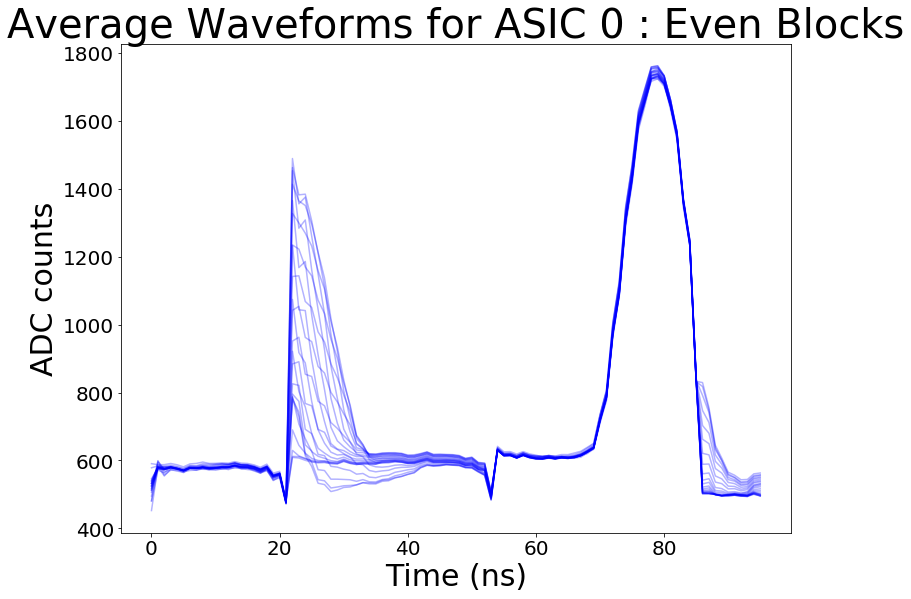

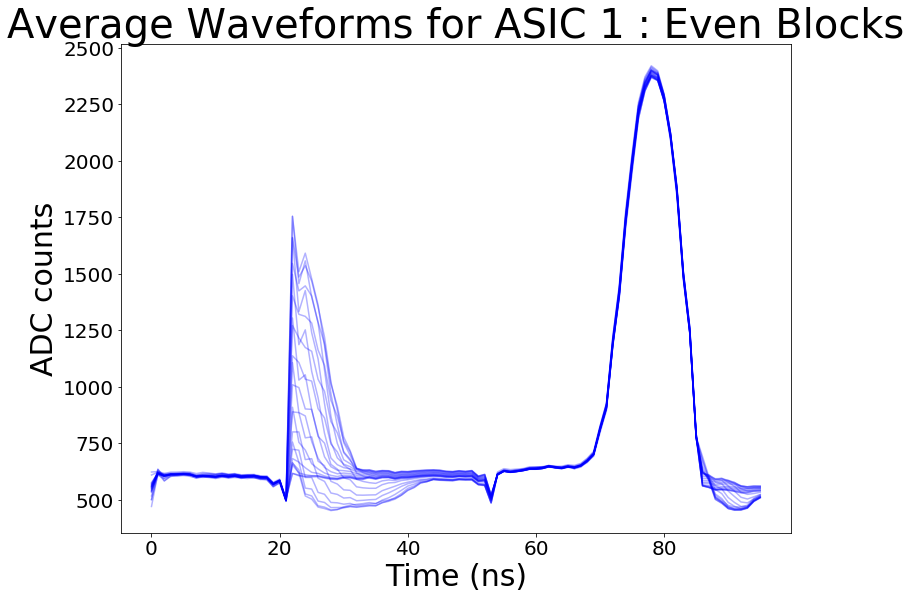

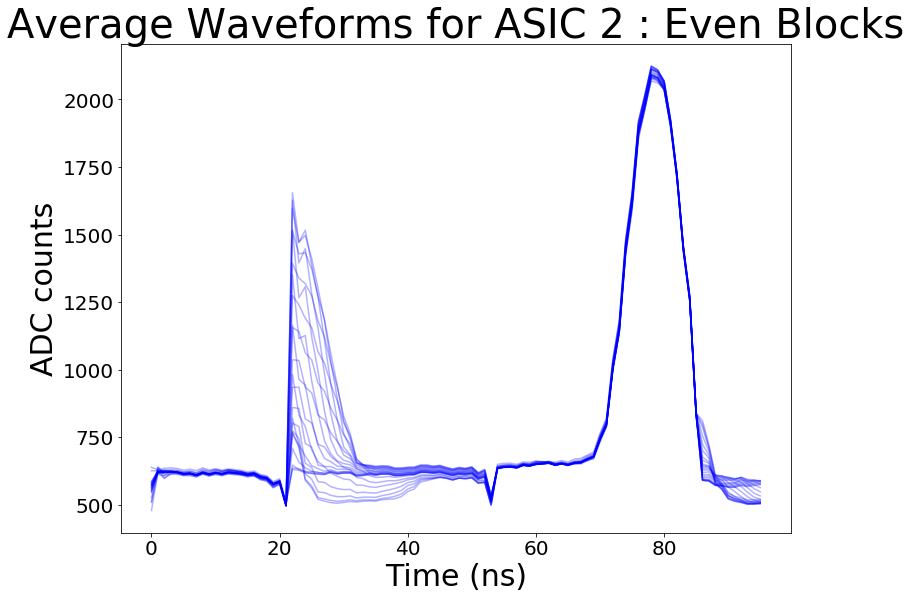

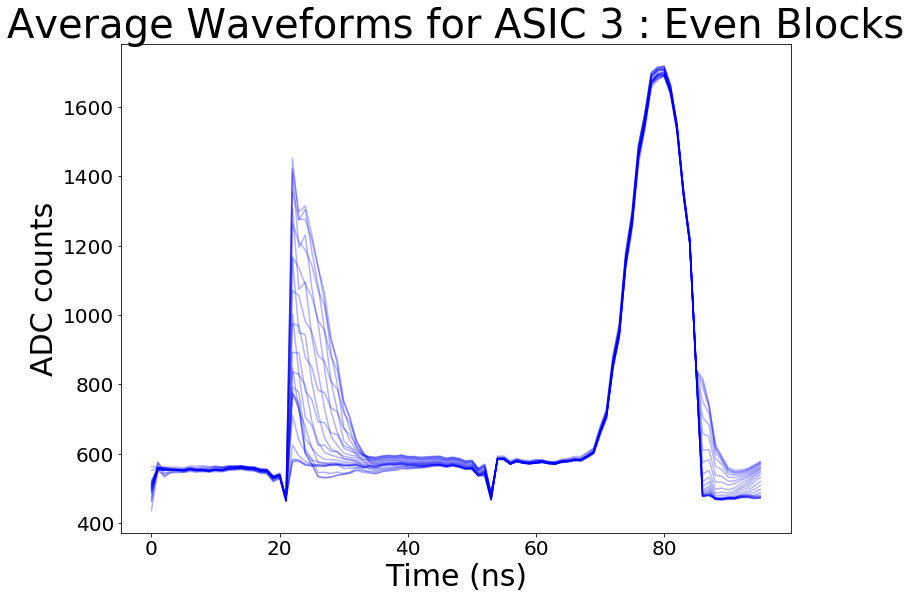

In [3]:
# Graph average waveform for only even blocks

STRB2_even = []
for ASIC in range(4):
    runs = []
    start_value = 0
    for run in range(320340,320363):
        data = np.loadtxt("/users/wipacuser/Desktop/CTA/Runs/ASIC Initialization Scans/STRB2 Location/sampleFileLarge_run" + str(run) + "ASIC" + str(ASIC) + "CH6.txt")
        waveforms = []
        av_phase = 0
        for event in range(5000):
            phase = int(data[event][4])
            av_phase+=phase/5000.0
            shift = 32 - phase - 1 + 16*(phase>=16) - 16*(phase<16)
            block = int(data[event][3])
            r = block//64
            c = block%64
            block = 8*c + r
            if block%2==0:
                waveforms.append(data[event][shift: shift+96])
        avg_waveform = []
        for point in range(96):
            a = []
            for event in range(len(waveforms)):
                a.append(waveforms[event][point])
            avg_waveform.append(np.mean(a))
        runs.append(avg_waveform)
        plt.plot(avg_waveform, label = str(start_value) + ' to ' + str(start_value + 10), color = 'b', alpha = 0.3)
        start_value = start_value + 1
    STRB2_even.append(runs)
    plt.title('Average Waveforms for ASIC ' + str(ASIC) + ' : Even Blocks')
    plt.ylabel('ADC counts')
    plt.xlabel('Time (ns)')
    plt.show()

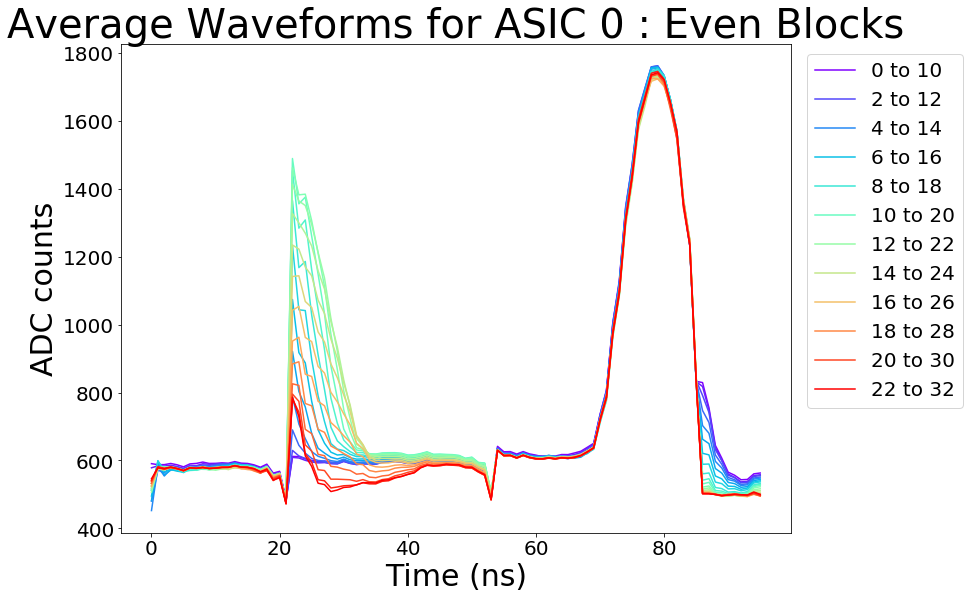

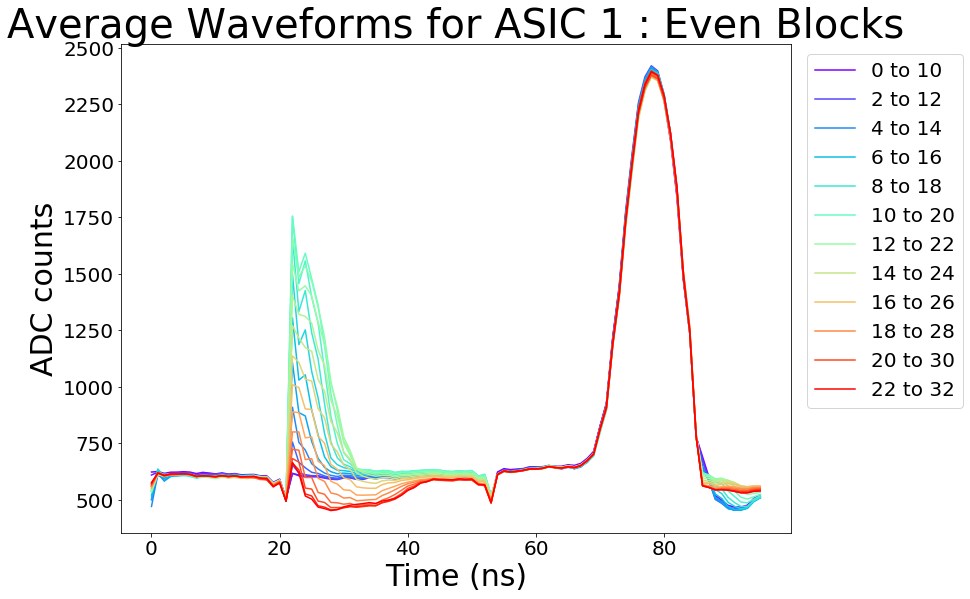

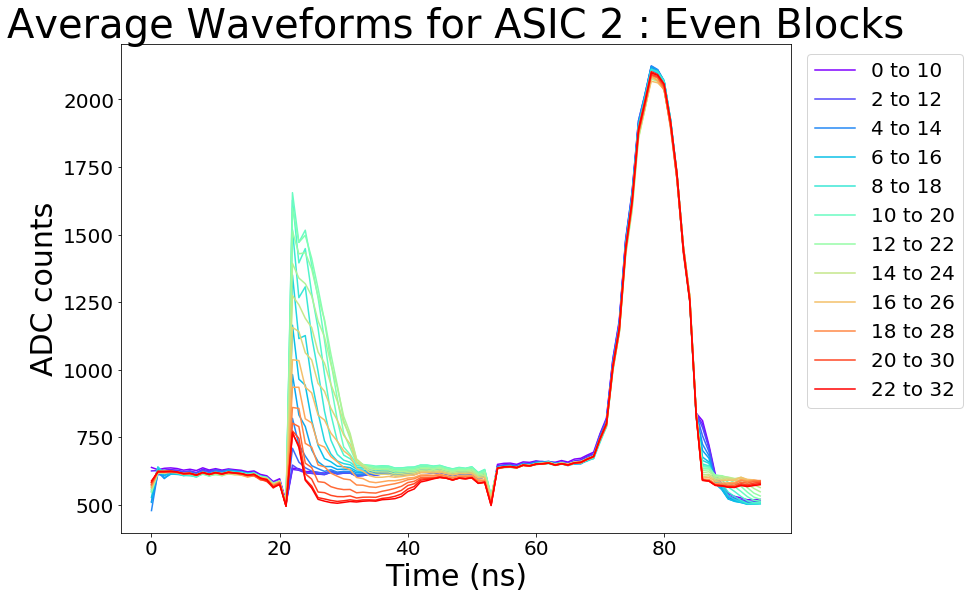

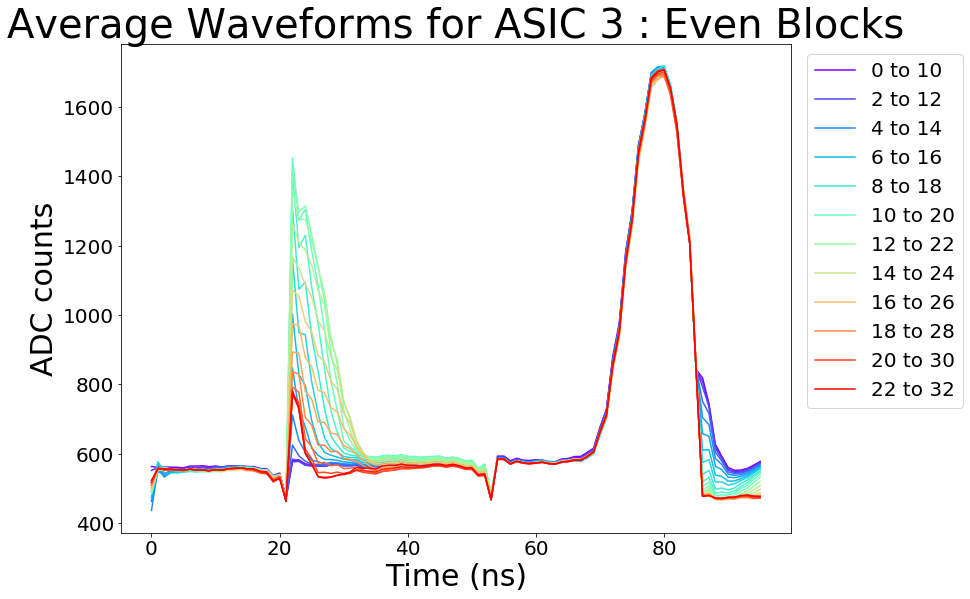

In [4]:
# Plot with rainbow colormap

number_runs = 23
cmap = plt.get_cmap('rainbow')
colors = [cmap(i) for i in np.linspace(0, 1, number_runs)]

for ASIC in range(4):
    start_value = 0
    for run in range(23):
        if run%2==0:
            plt.plot(STRB2_even[ASIC][run], label = str(start_value) + ' to ' + str(start_value + 10), color = colors[run])
            start_value = start_value + 1
        else:
            plt.plot(STRB2_even[ASIC][run], color = colors[run])
            start_value = start_value + 1
    plt.title('Average Waveforms for ASIC ' + str(ASIC) + ' : Even Blocks')
    plt.ylabel('ADC counts')
    plt.xlabel('Time (ns)')
    plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
    plt.show()

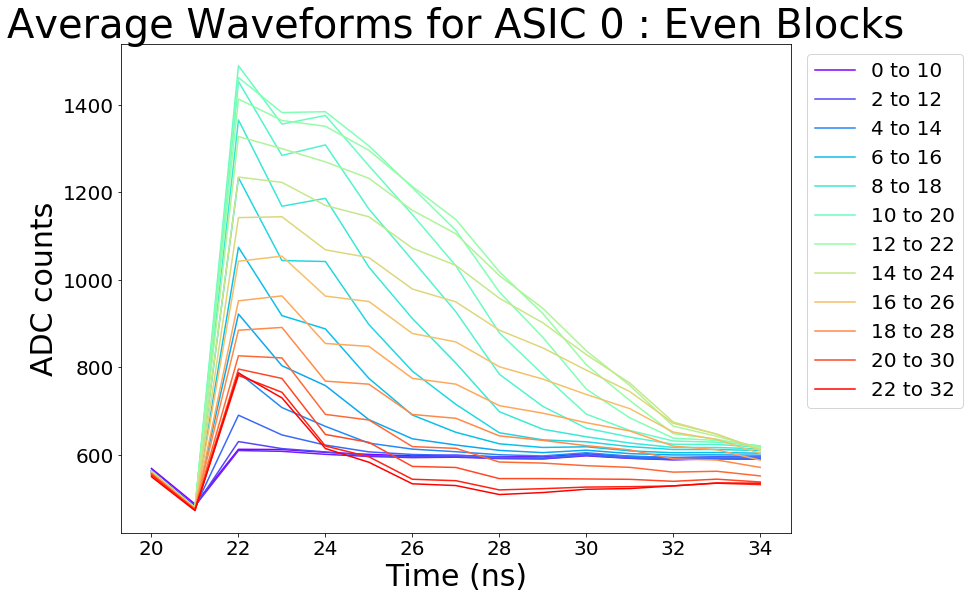

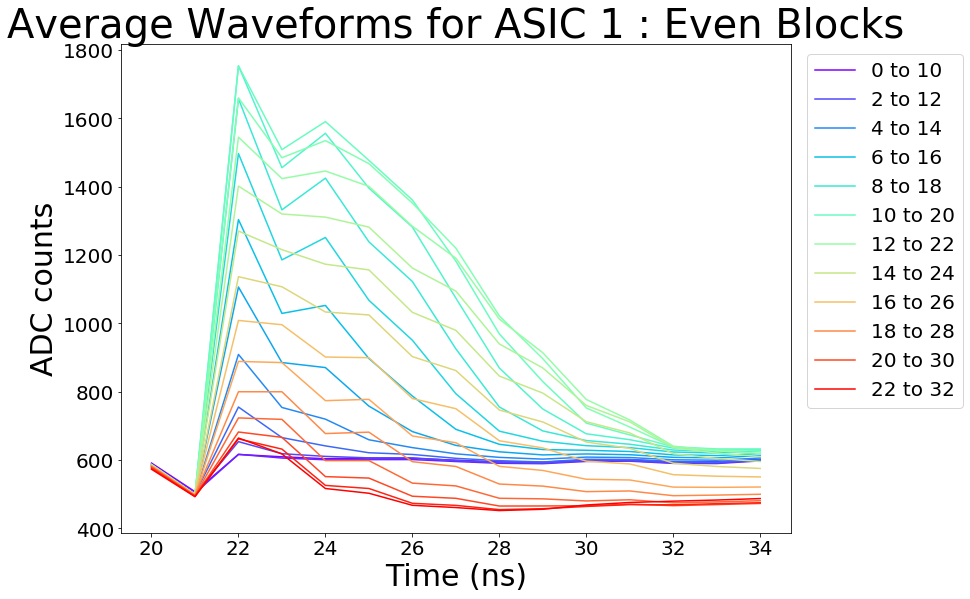

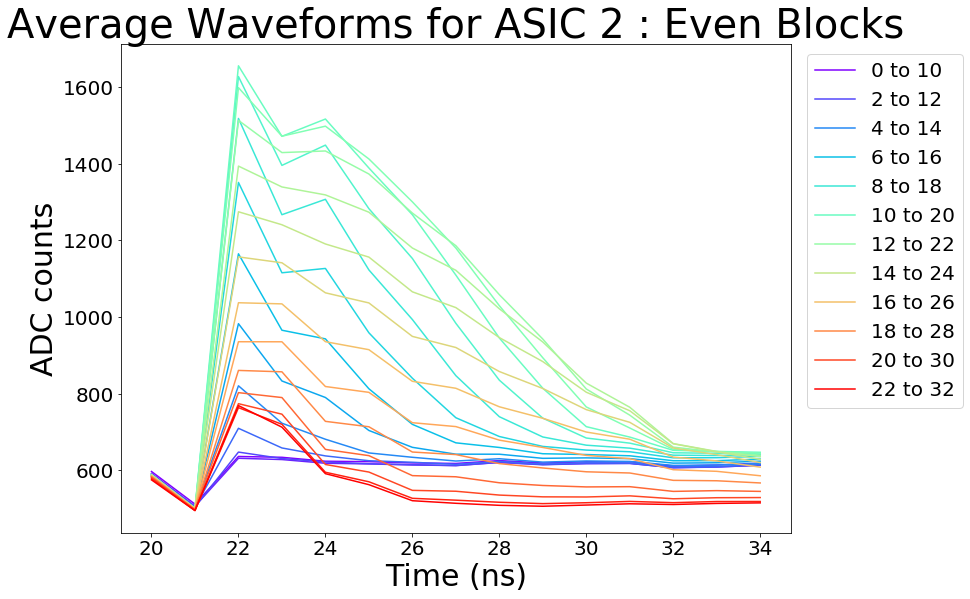

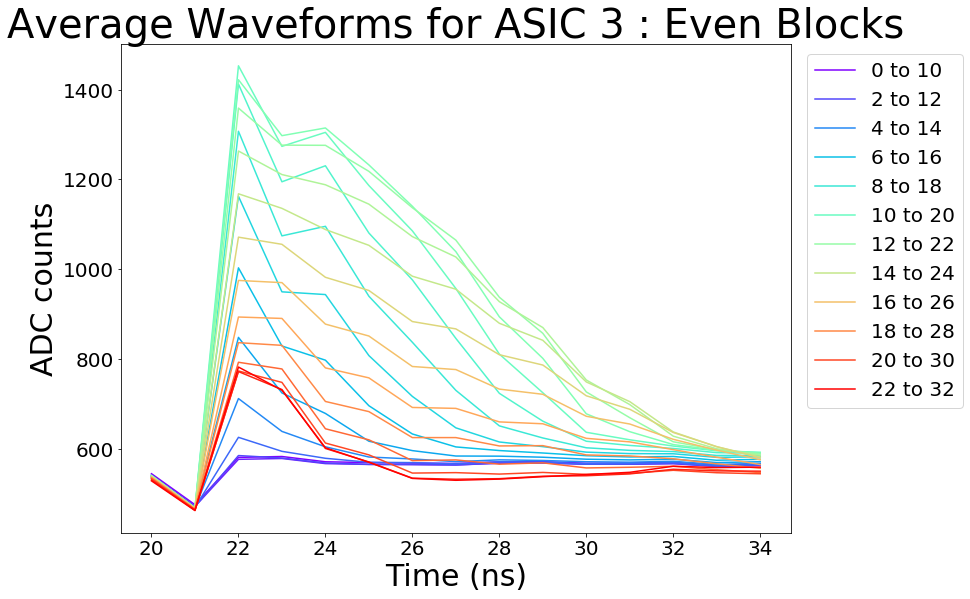

In [5]:
# zoom in on 20-35

number_runs = 23
cmap = plt.get_cmap('rainbow')
colors = [cmap(i) for i in np.linspace(0, 1, number_runs)]

time = [x for x in range(20,35)]
for ASIC in range(4):
    start_value = 0
    for run in range(23):
        if run%2==0:
            plt.plot(time, STRB2_even[ASIC][run][20:35], label = str(start_value) + ' to ' + str(start_value + 10), color = colors[run])
            start_value = start_value + 1
        else:
            plt.plot(time, STRB2_even[ASIC][run][20:35], color = colors[run])
            start_value = start_value + 1
    plt.title('Average Waveforms for ASIC ' + str(ASIC) + ' : Even Blocks')
    plt.ylabel('ADC counts')
    plt.xlabel('Time (ns)')
    plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
    plt.show()

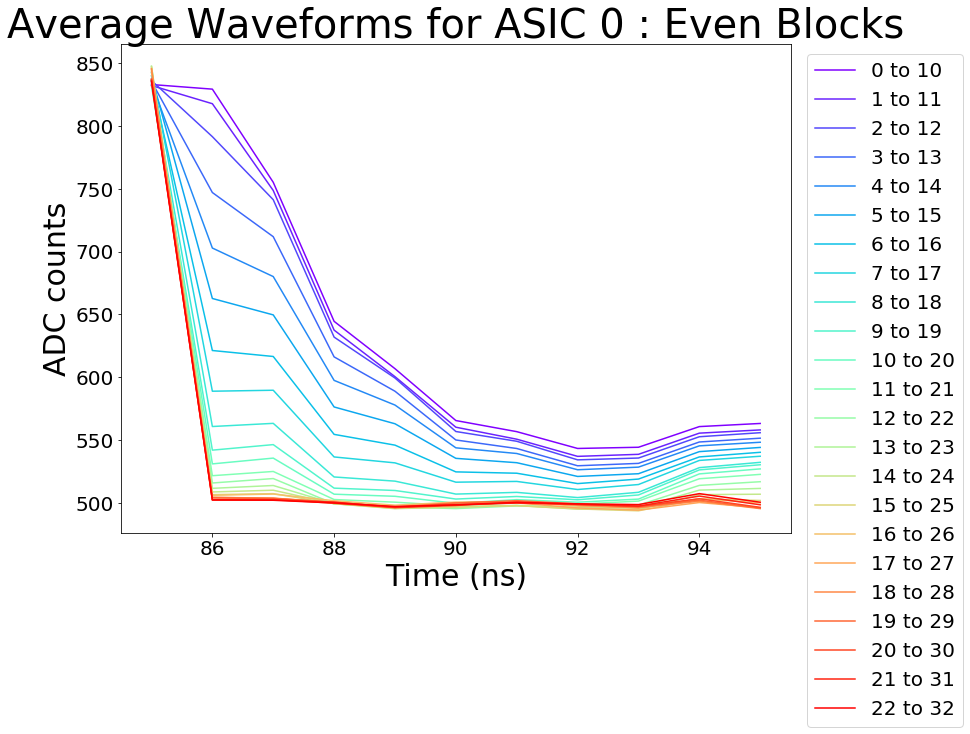

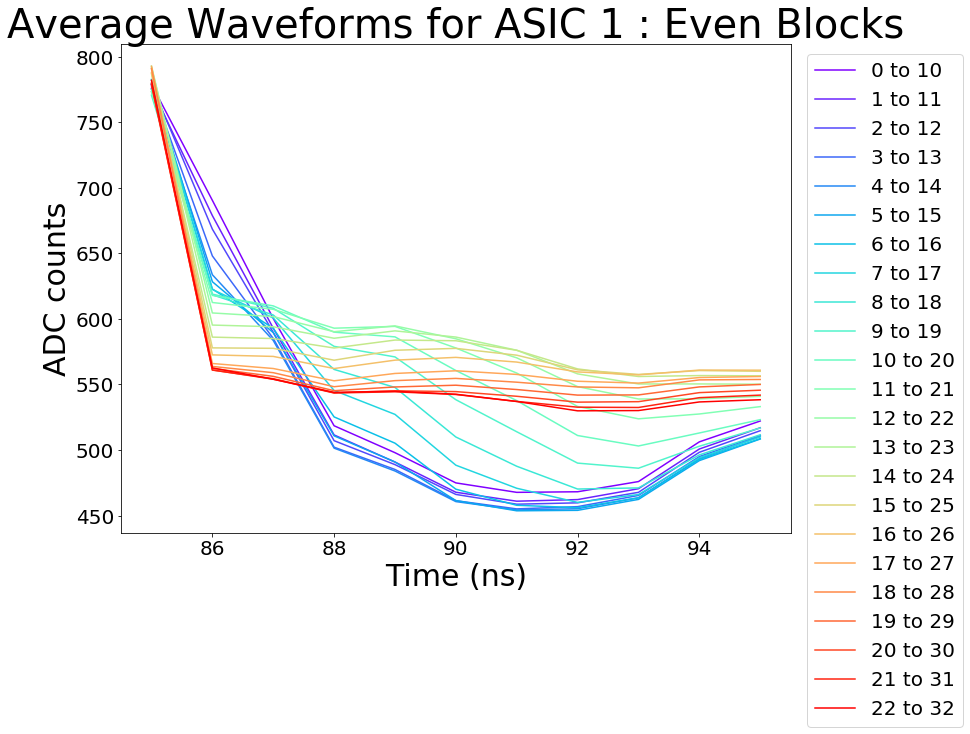

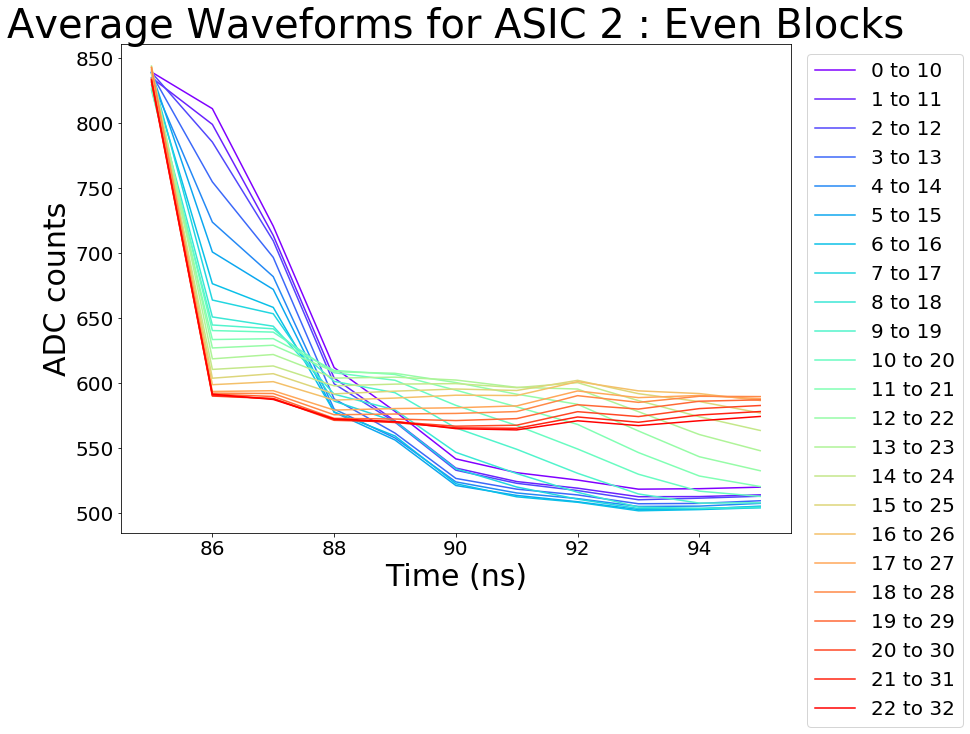

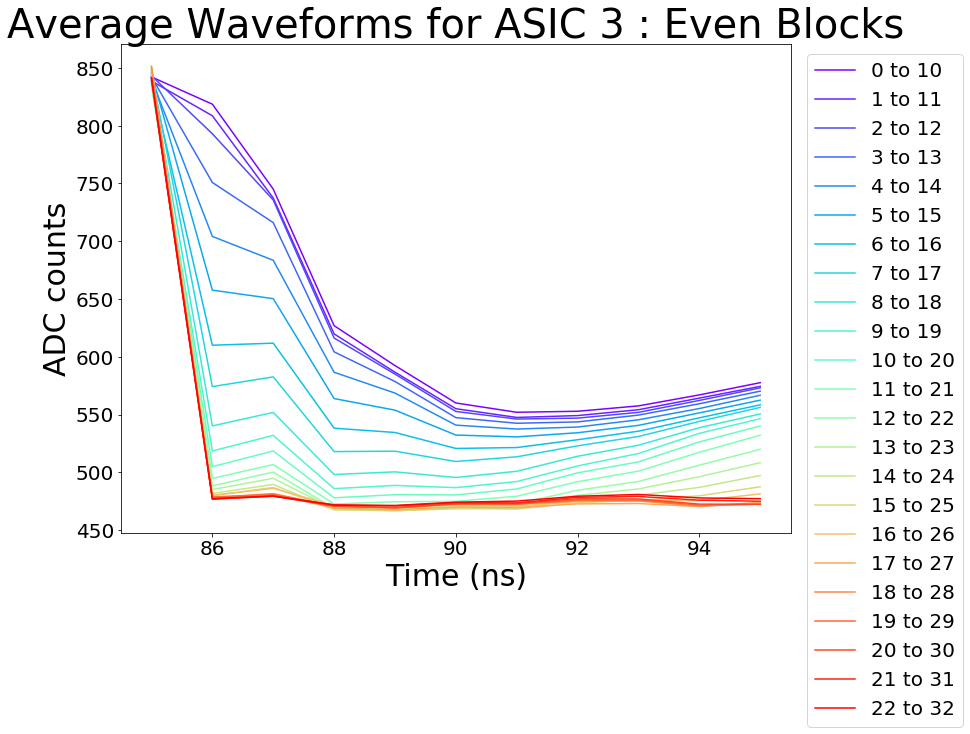

In [11]:
# zoom in on 85-96

number_runs = 23
cmap = plt.get_cmap('rainbow')
colors = [cmap(i) for i in np.linspace(0, 1, number_runs)]

time = [x for x in range(85,96)]
for ASIC in range(4):
    start_value = 0
    for run in range(23):
        plt.plot(time, STRB2_even[ASIC][run][85:96], label = str(start_value) + ' to ' + str(start_value + 10), color = colors[run])
        start_value = start_value + 1
    plt.title('Average Waveforms for ASIC ' + str(ASIC) + ' : Even Blocks')
    plt.ylabel('ADC counts')
    plt.xlabel('Time (ns)')
    plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
    plt.show()

ASIC 0
[611.93449419568822, 609.14963797264681, 629.62975071516144, 689.95977011494256, 787.15941439609594, 921.24516383734704, 1073.8643999999999, 1232.9856858846917, 1364.8872509960158, 1452.8280228758169, 1488.7471172962228, 1461.9733810091379, 1412.8350597609563, 1326.9912420382166, 1234.3078730904817, 1141.6481553398057, 1041.8513833992095, 951.391196013289, 884.1592637054822, 825.71774513695914, 795.46159968165534, 780.86692307692306, 786.18247298919573]
ASIC 1
[616.41583747927029, 616.73290426387769, 653.89333878218224, 755.21100164203608, 909.24440829605533, 1106.49901302803, 1303.9159999999999, 1497.09662027833, 1657.8207171314741, 1754.0314542483661, 1753.537574552684, 1660.1700437028207, 1545.1151394422311, 1401.9295382165606, 1270.3016059537799, 1136.7269902912622, 1008.6703557312253, 888.71511627906978, 799.92757102841142, 723.30329495831677, 682.08356545960999, 661.98000000000002, 664.51820728291318]
ASIC 2
[635.74336650082921, 631.05913113435236, 647.16019615856146, 709.

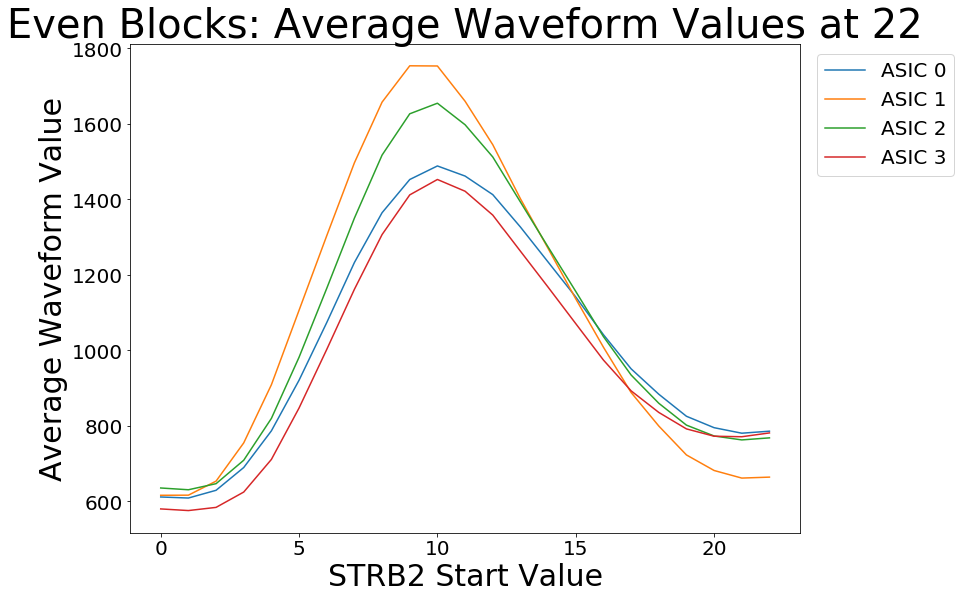

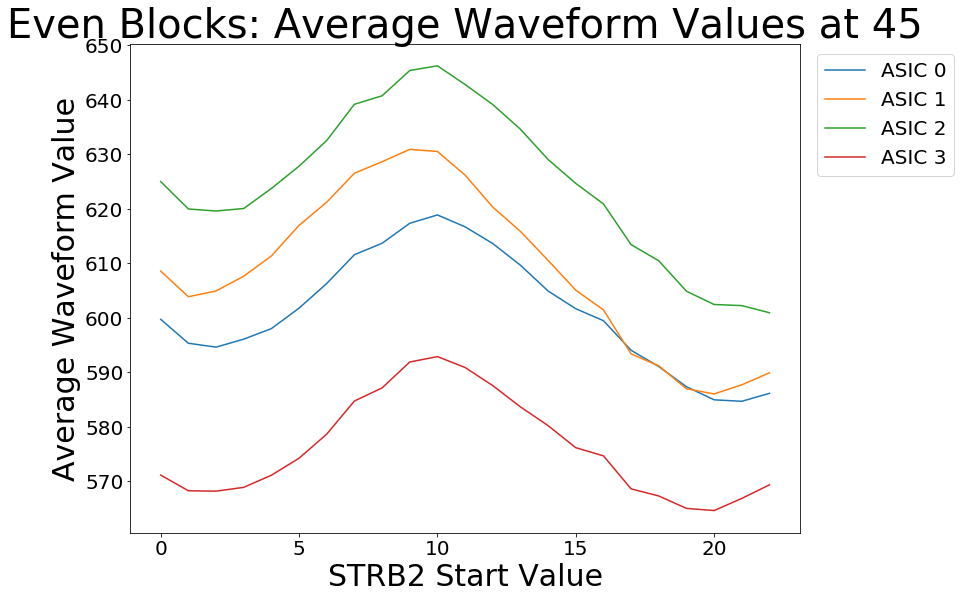

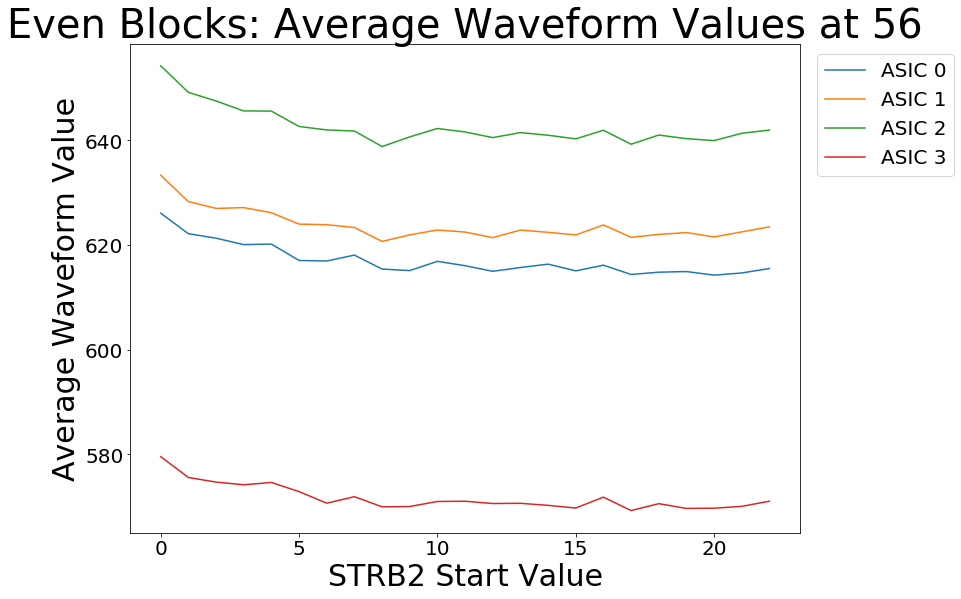

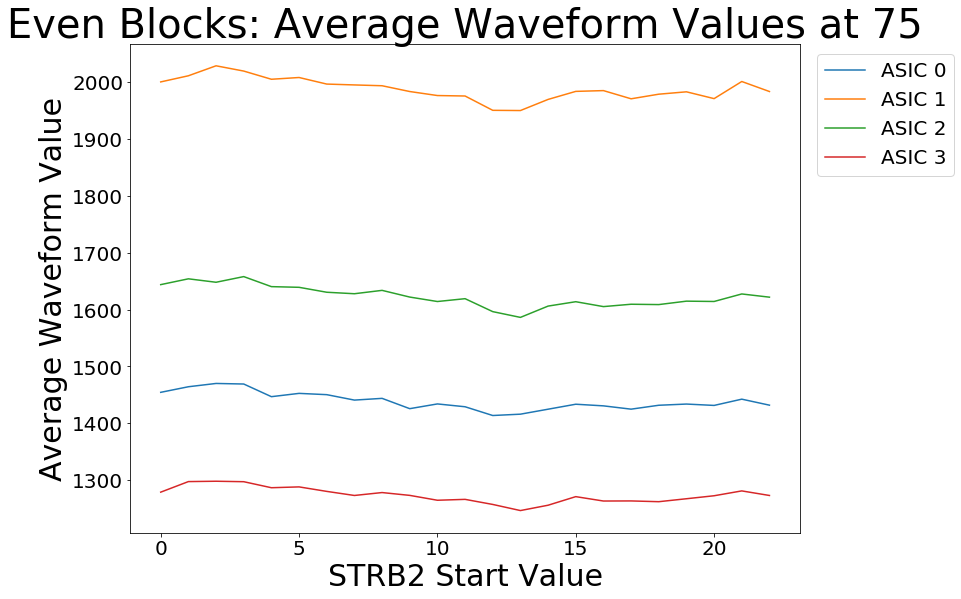

ASIC 0
[565.49295190713099, 560.19187449718424, 556.76747037188397, 550.02257799671588, 543.77714518096786, 535.40189498618236, 524.62840000000006, 516.43300198807162, 506.95298804780879, 503.0, 499.59363817097415, 497.63726658720697, 495.40039840637451, 496.45501592356686, 496.53466509988249, 496.94990291262138, 500.59090909090907, 498.8891196013289, 500.02320928371347, 499.82890035728462, 497.89017111022685, 498.47884615384618, 498.34853941576631]
ASIC 1
[474.97885572139302, 467.84392598551892, 466.18226399673068, 461.41543513957305, 460.71370475803172, 461.49151204105806, 470.18959999999998, 488.47316103379723, 509.96254980079681, 538.40686274509801, 560.66838966202783, 577.84743742550654, 584.86932270916338, 586.17237261146499, 583.35761848805328, 577.54912621359222, 570.68063241106722, 560.45224252491698, 554.65266106442573, 549.4569273521239, 544.58137684042981, 542.3761538461539, 542.56702681072431]
ASIC 2
[541.93034825870643, 534.88857602574421, 533.22190437270126, 526.90270935

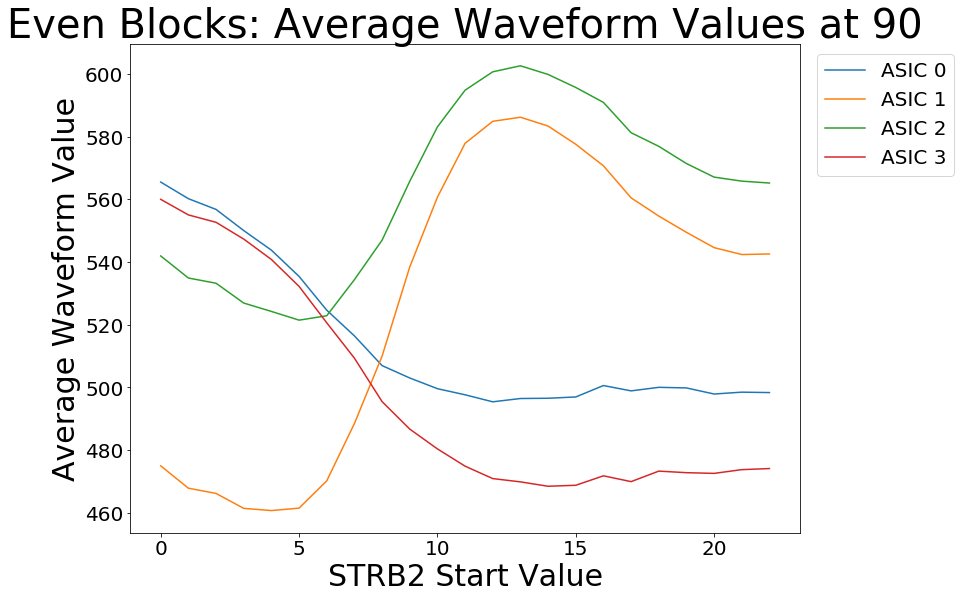

In [13]:
# Graph the value of each average waveform at 22, 56, 75, and 90.
start = [i for i in range(23)]

# at value 22
for ASIC in range(4):
    value = []
    for run in range(23):
        value.append(STRB2_even[ASIC][run][22])
    plt.plot(start,value, label = 'ASIC ' + str(ASIC))
    print('ASIC ' + str(ASIC))
    print(value)
plt.title('Even Blocks: Average Waveform Values at 22')
plt.xlabel('STRB2 Start Value')
plt.ylabel('Average Waveform Value')
plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
plt.show()

# at value 45
for ASIC in range(4):
    value = []
    for run in range(23):
        value.append(STRB2_even[ASIC][run][45])
    plt.plot(start,value, label = 'ASIC ' + str(ASIC))
plt.title('Even Blocks: Average Waveform Values at 45')
plt.xlabel('STRB2 Start Value')
plt.ylabel('Average Waveform Value')
plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
plt.show()

# at value 56
for ASIC in range(4):
    value = []
    for run in range(23):
        value.append(STRB2_even[ASIC][run][56])
    plt.plot(start,value, label = 'ASIC ' + str(ASIC))
plt.title('Even Blocks: Average Waveform Values at 56')
plt.xlabel('STRB2 Start Value')
plt.ylabel('Average Waveform Value')
plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
plt.show()

# at value 75
for ASIC in range(4):
    value = []
    for run in range(23):
        value.append(STRB2_even[ASIC][run][75])
    plt.plot(start,value, label = 'ASIC ' + str(ASIC))
plt.title('Even Blocks: Average Waveform Values at 75')
plt.xlabel('STRB2 Start Value')
plt.ylabel('Average Waveform Value')
plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
plt.show()

# at value 90
for ASIC in range(4):
    value = []
    for run in range(23):
        value.append(STRB2_even[ASIC][run][90])
    plt.plot(start,value, label = 'ASIC ' + str(ASIC))
    print('ASIC ' + str(ASIC))
    print(value)
plt.title('Even Blocks: Average Waveform Values at 90')
plt.xlabel('STRB2 Start Value')
plt.ylabel('Average Waveform Value')
plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
plt.show()

In [9]:
## Odd Blocks Only ##

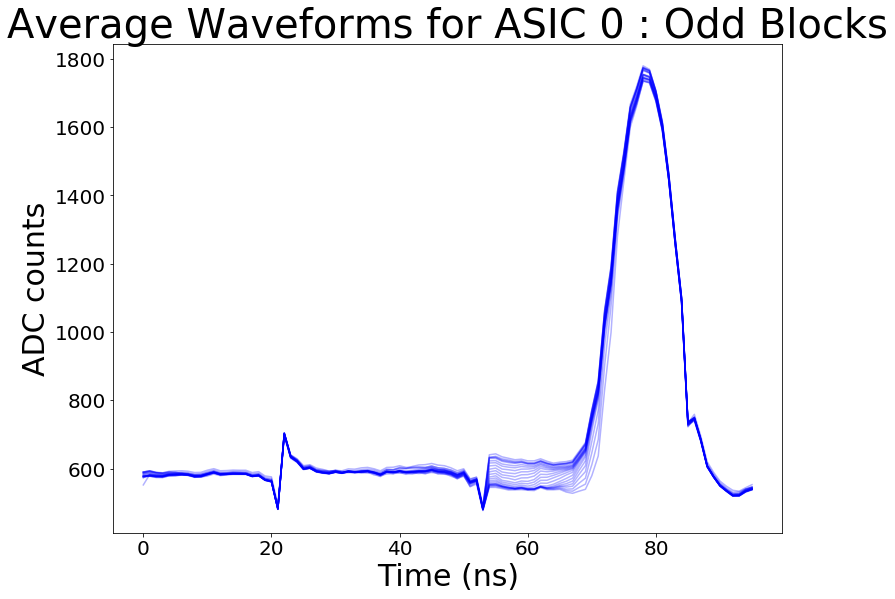

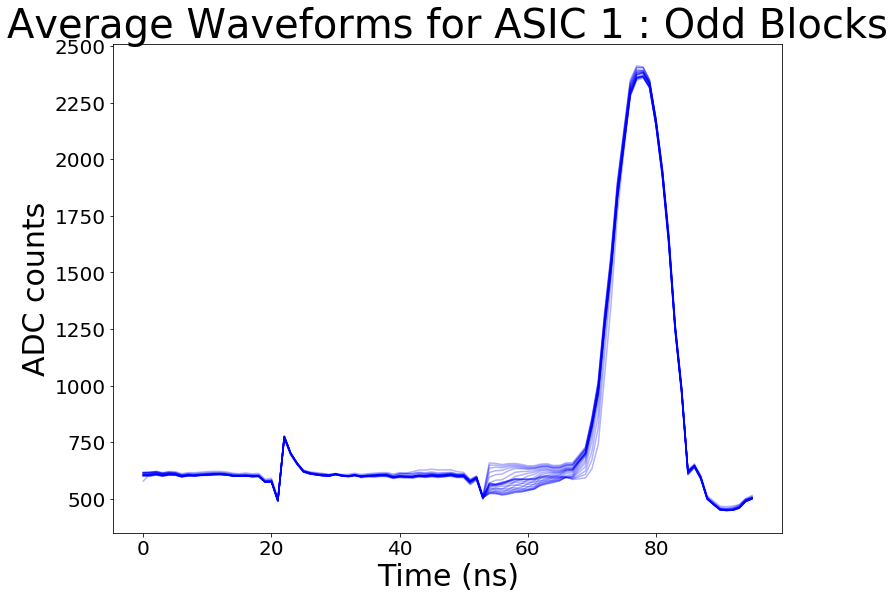

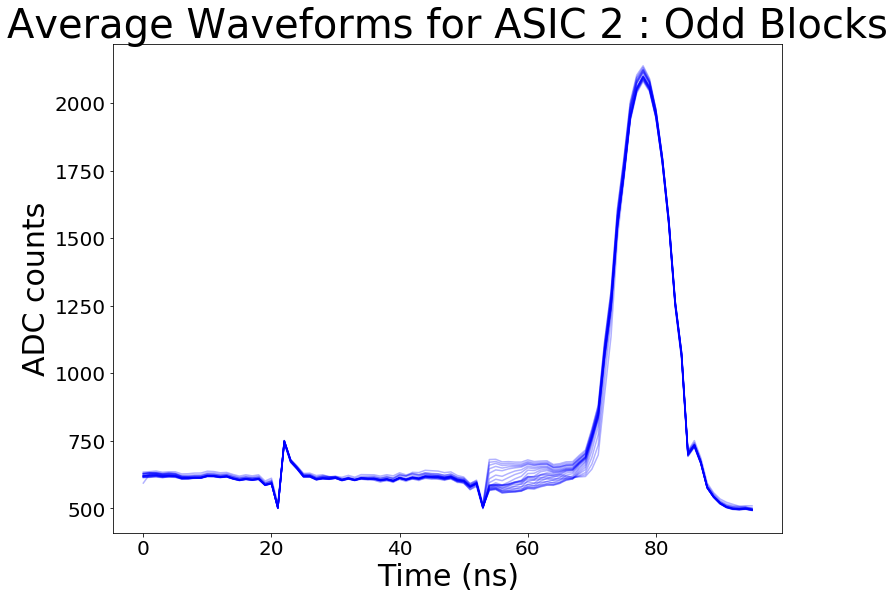

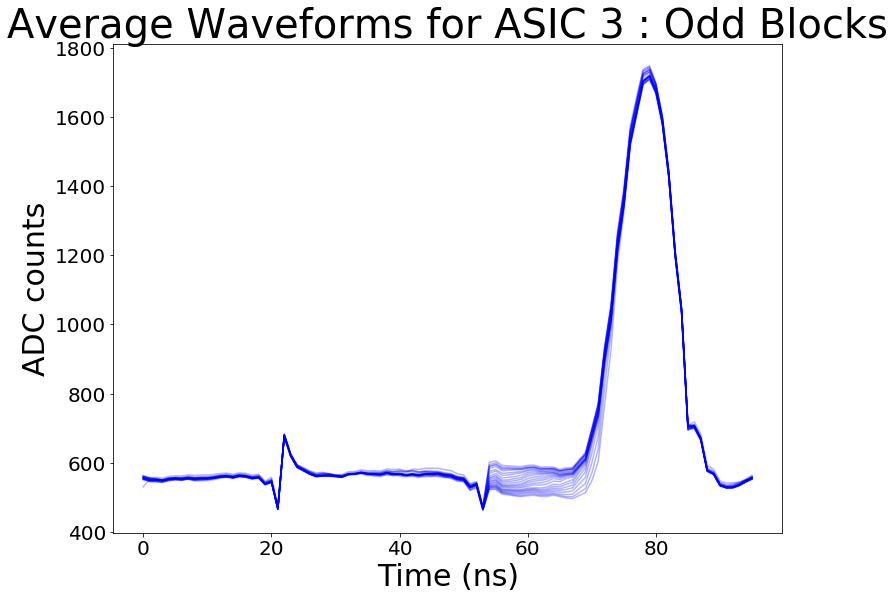

In [6]:
# Graph average waveform for only odd blocks

STRB2_odd = []
for ASIC in range(4):
    runs = []
    start_value = 0
    for run in range(320340,320363):
        data = np.loadtxt("/users/wipacuser/Desktop/CTA/Runs/ASIC Initialization Scans/STRB2 Location/sampleFileLarge_run" + str(run) + "ASIC" + str(ASIC) + "CH6.txt")
        waveforms = []
        av_phase = 0
        for event in range(5000):
            phase = int(data[event][4])
            av_phase+=phase/5000.0
            shift = 32 - phase - 1 + 16*(phase>=16) - 16*(phase<16)
            block = int(data[event][3])
            r = block//64
            c = block%64
            block = 8*c + r
            if block%2!=0:
                waveforms.append(data[event][shift: shift+96])
        avg_waveform = []
        for point in range(96):
            a = []
            for event in range(len(waveforms)):
                a.append(waveforms[event][point])
            avg_waveform.append(np.mean(a))
        runs.append(avg_waveform)
        plt.plot(avg_waveform, label = str(start_value) + ' to ' + str(start_value + 10), color = 'b', alpha = 0.3)
        start_value = start_value + 1
    STRB2_odd.append(runs)
    plt.title('Average Waveforms for ASIC ' + str(ASIC) + ' : Odd Blocks')
    plt.ylabel('ADC counts')
    plt.xlabel('Time (ns)')
    plt.show()

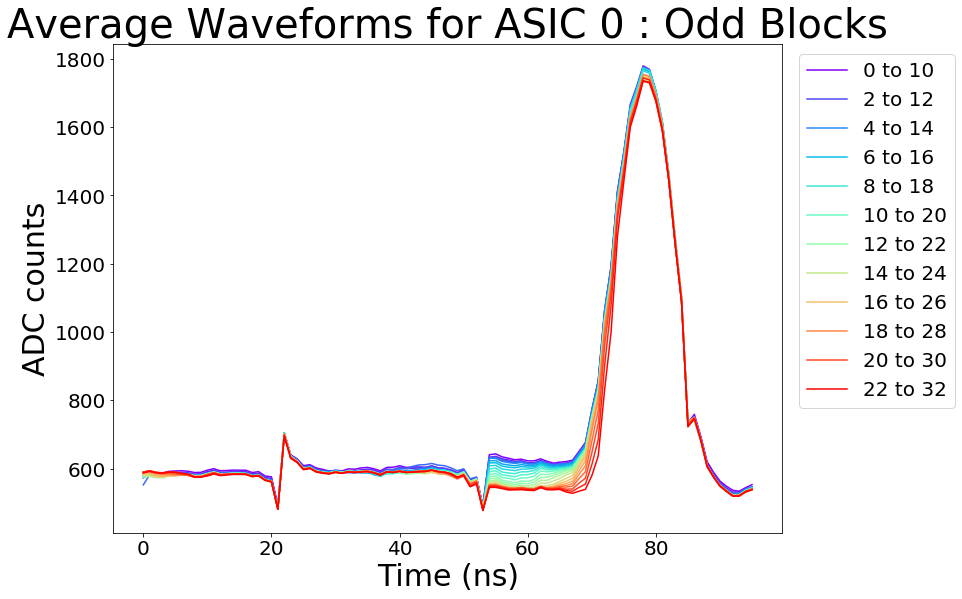

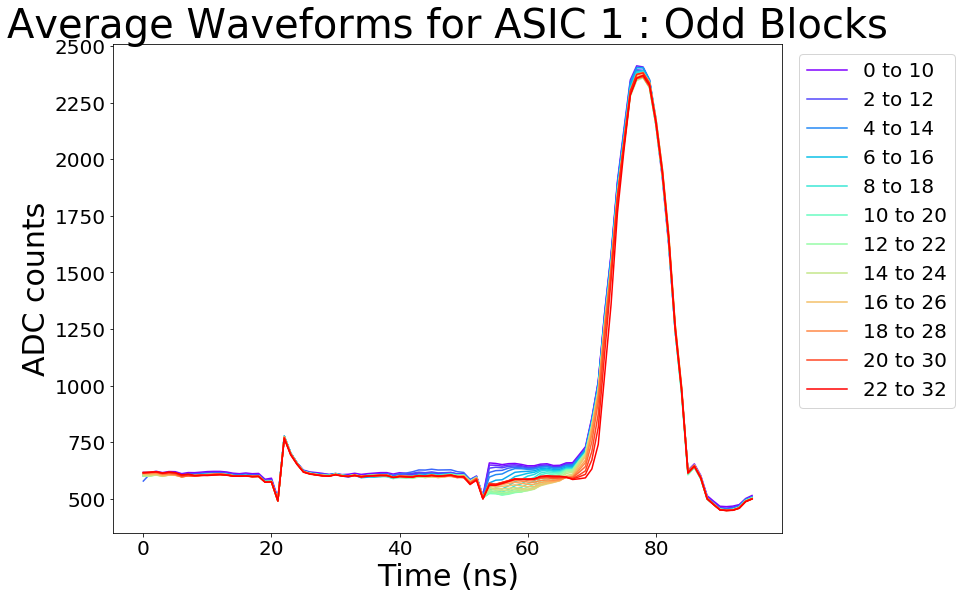

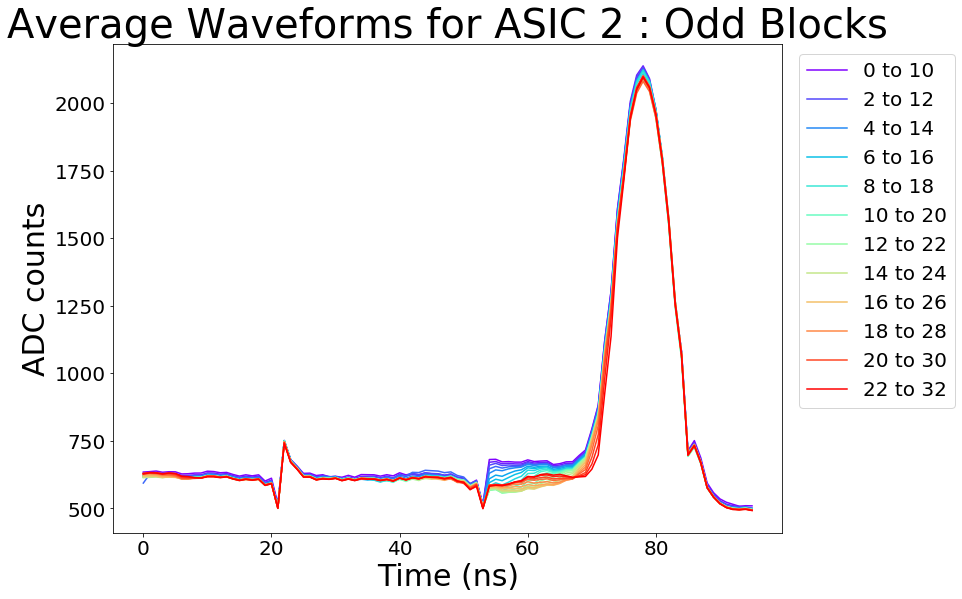

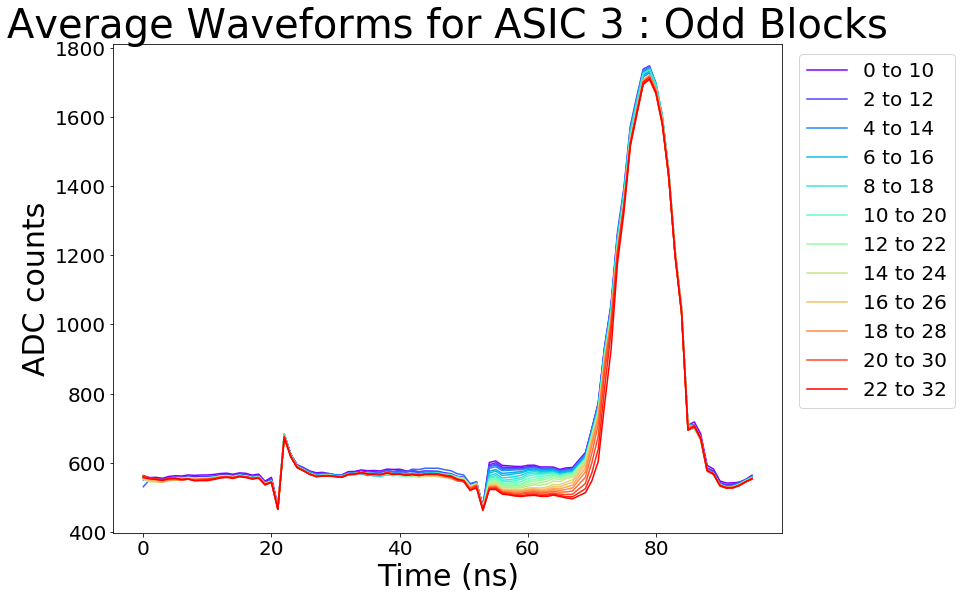

In [7]:
# Plot with rainbow colormap

number_runs = 23
cmap = plt.get_cmap('rainbow')
colors = [cmap(i) for i in np.linspace(0, 1, number_runs)]

for ASIC in range(4):
    start_value = 0
    for run in range(23):
        if run%2==0:
            plt.plot(STRB2_odd[ASIC][run], label = str(start_value) + ' to ' + str(start_value + 10), color = colors[run])
            start_value = start_value + 1
        else:
            plt.plot(STRB2_odd[ASIC][run], color = colors[run])
            start_value = start_value + 1
    plt.title('Average Waveforms for ASIC ' + str(ASIC) + ' : Odd Blocks')
    plt.ylabel('ADC counts')
    plt.xlabel('Time (ns)')
    plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
    plt.show()

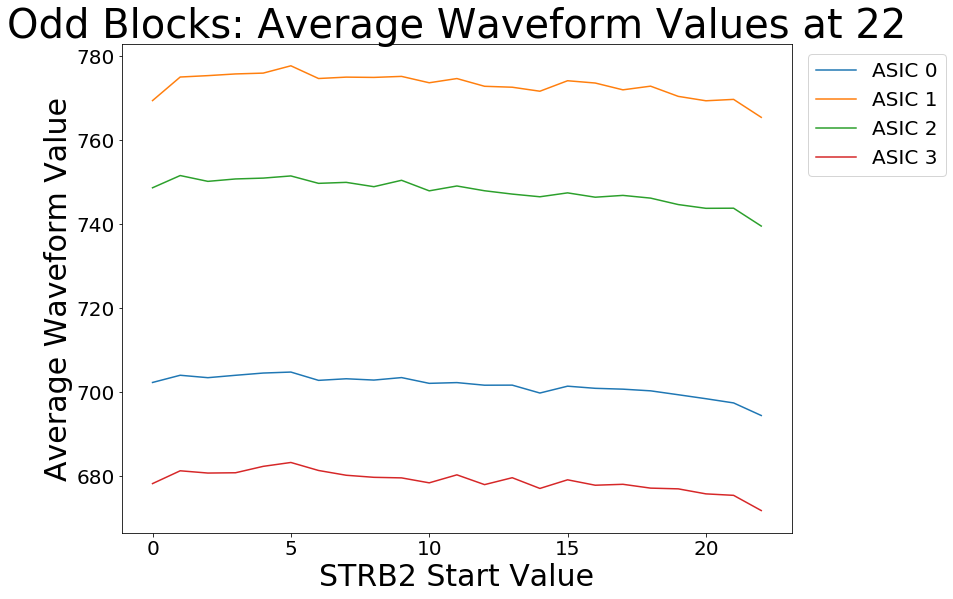

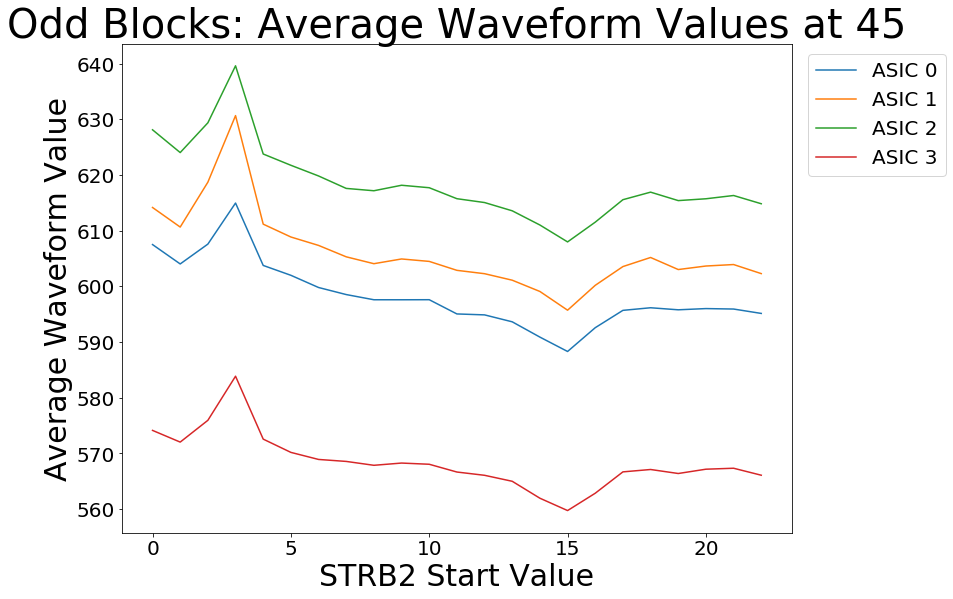

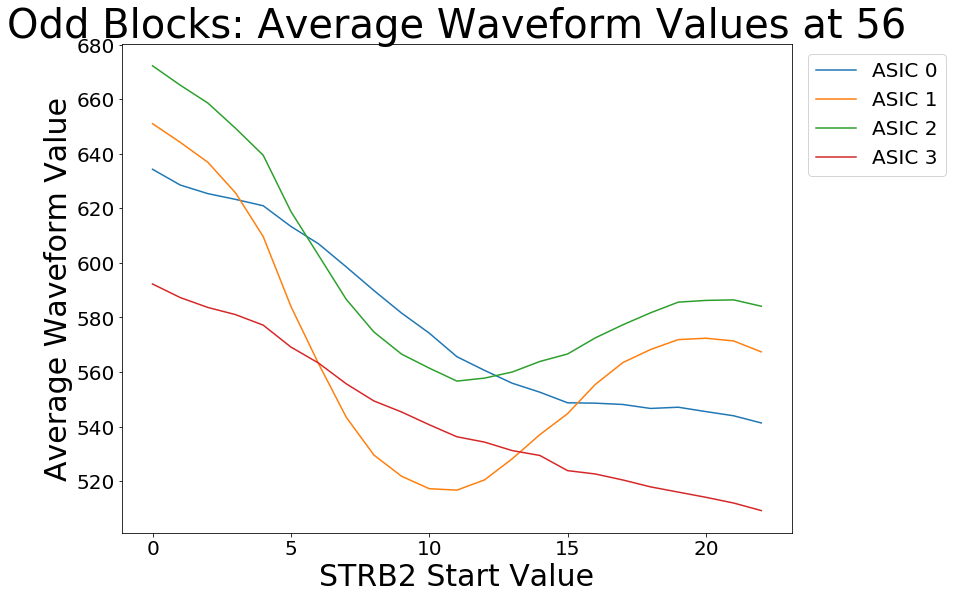

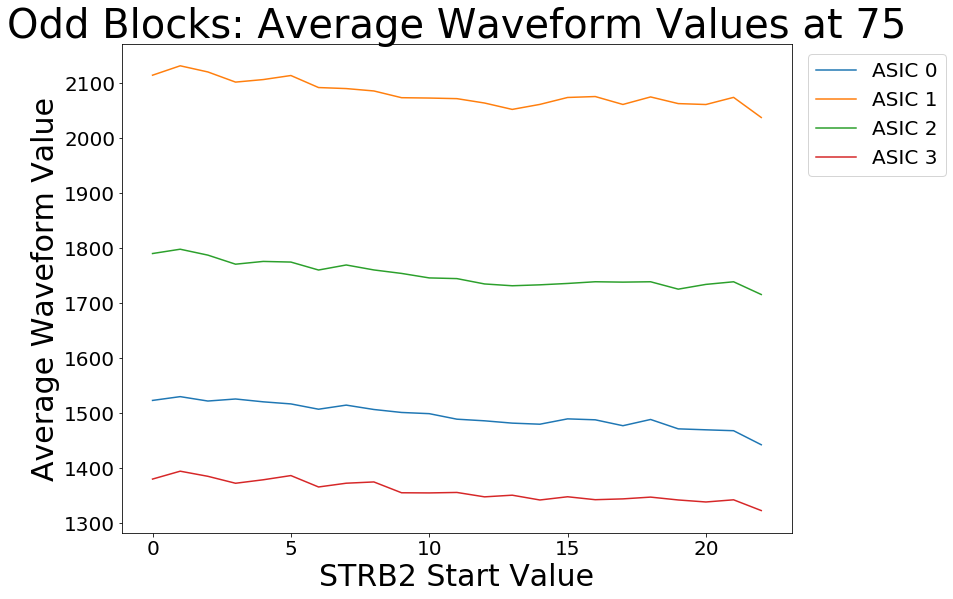

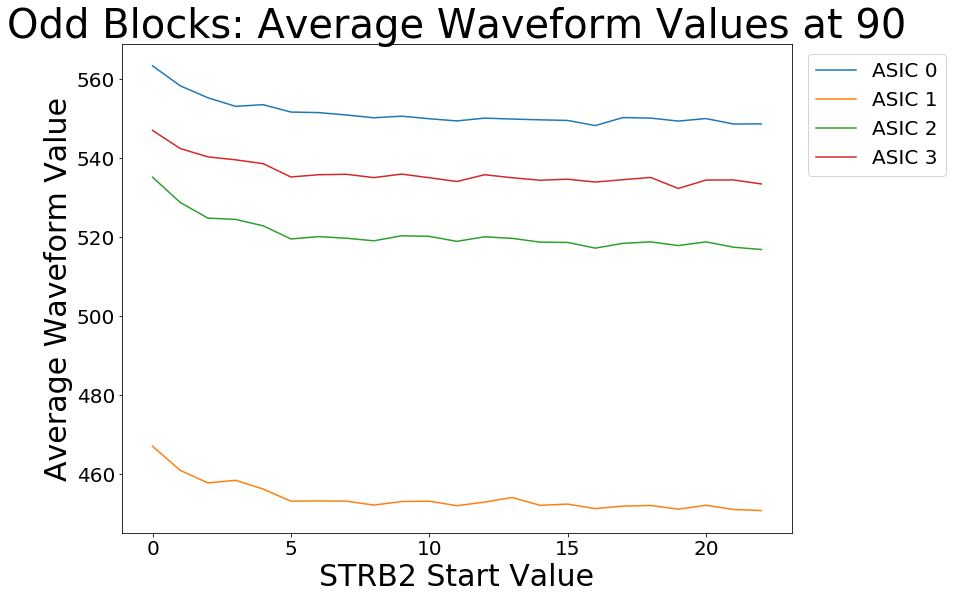

In [9]:
# Graph the value of each average waveform at 22, 56, 75, and 90.
start = [i for i in range(23)]

# at value 22
for ASIC in range(4):
    value = []
    for run in range(23):
        value.append(STRB2_odd[ASIC][run][22])
    plt.plot(start,value, label = 'ASIC ' + str(ASIC))
plt.title('Odd Blocks: Average Waveform Values at 22')
plt.xlabel('STRB2 Start Value')
plt.ylabel('Average Waveform Value')
plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
plt.show()

# at value 45
for ASIC in range(4):
    value = []
    for run in range(23):
        value.append(STRB2_odd[ASIC][run][45])
    plt.plot(start,value, label = 'ASIC ' + str(ASIC))
plt.title('Odd Blocks: Average Waveform Values at 45')
plt.xlabel('STRB2 Start Value')
plt.ylabel('Average Waveform Value')
plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
plt.show()

# at value 56
for ASIC in range(4):
    value = []
    for run in range(23):
        value.append(STRB2_odd[ASIC][run][56])
    plt.plot(start,value, label = 'ASIC ' + str(ASIC))
plt.title('Odd Blocks: Average Waveform Values at 56')
plt.xlabel('STRB2 Start Value')
plt.ylabel('Average Waveform Value')
plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
plt.show()

# at value 75
for ASIC in range(4):
    value = []
    for run in range(23):
        value.append(STRB2_odd[ASIC][run][75])
    plt.plot(start,value, label = 'ASIC ' + str(ASIC))
plt.title('Odd Blocks: Average Waveform Values at 75')
plt.xlabel('STRB2 Start Value')
plt.ylabel('Average Waveform Value')
plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
plt.show()

# at value 90
for ASIC in range(4):
    value = []
    for run in range(23):
        value.append(STRB2_odd[ASIC][run][90])
    plt.plot(start,value, label = 'ASIC ' + str(ASIC))
plt.title('Odd Blocks: Average Waveform Values at 90')
plt.xlabel('STRB2 Start Value')
plt.ylabel('Average Waveform Value')
plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
plt.show()

In [ ]:
# The best STRB2 window seems to be 0-10

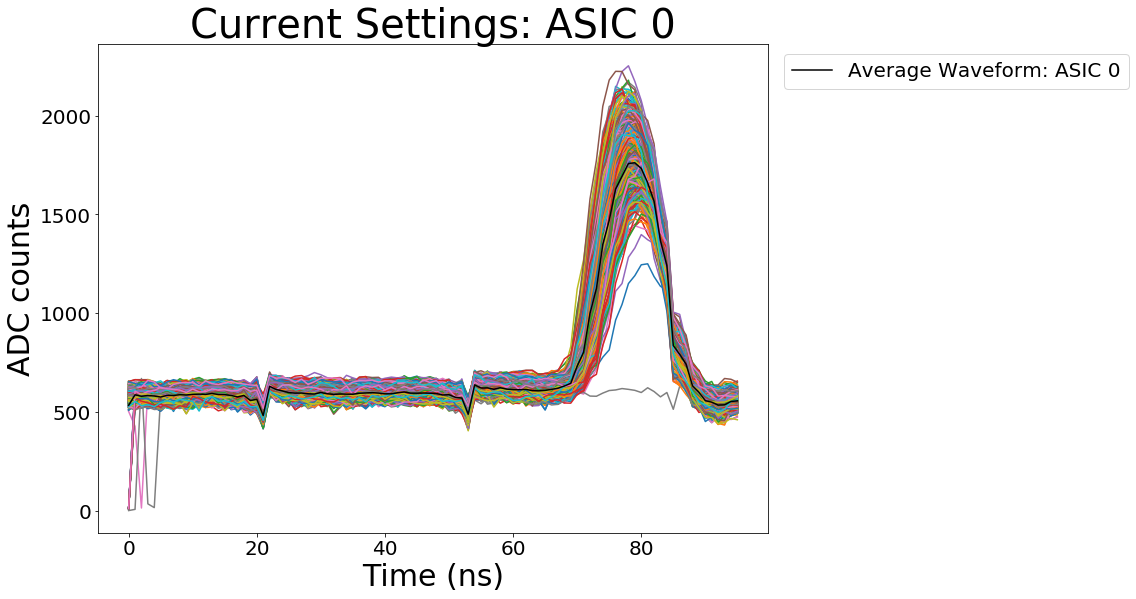

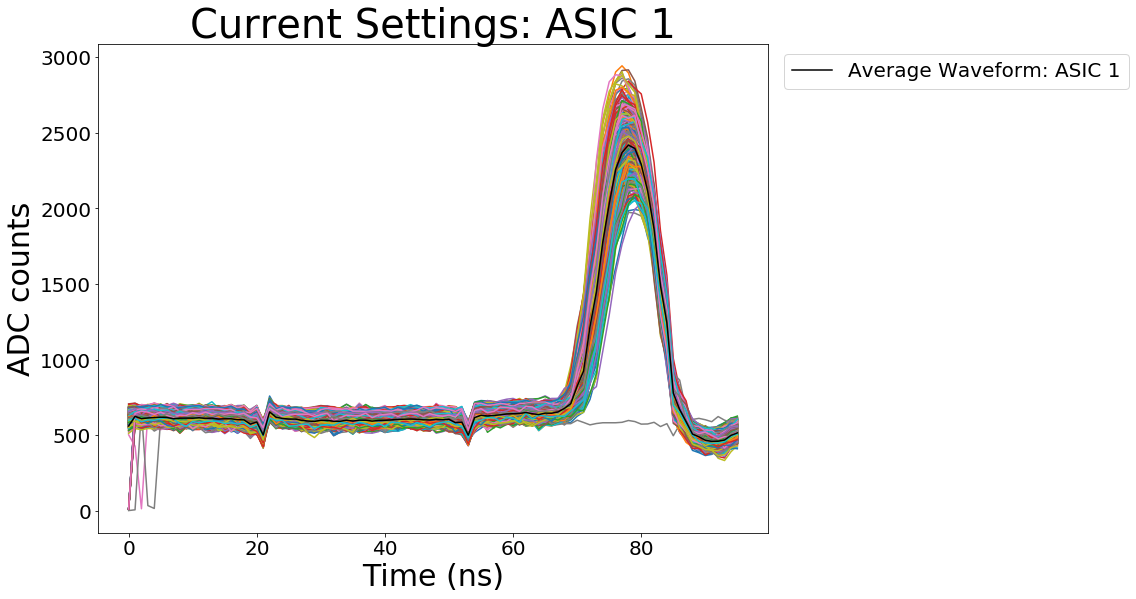

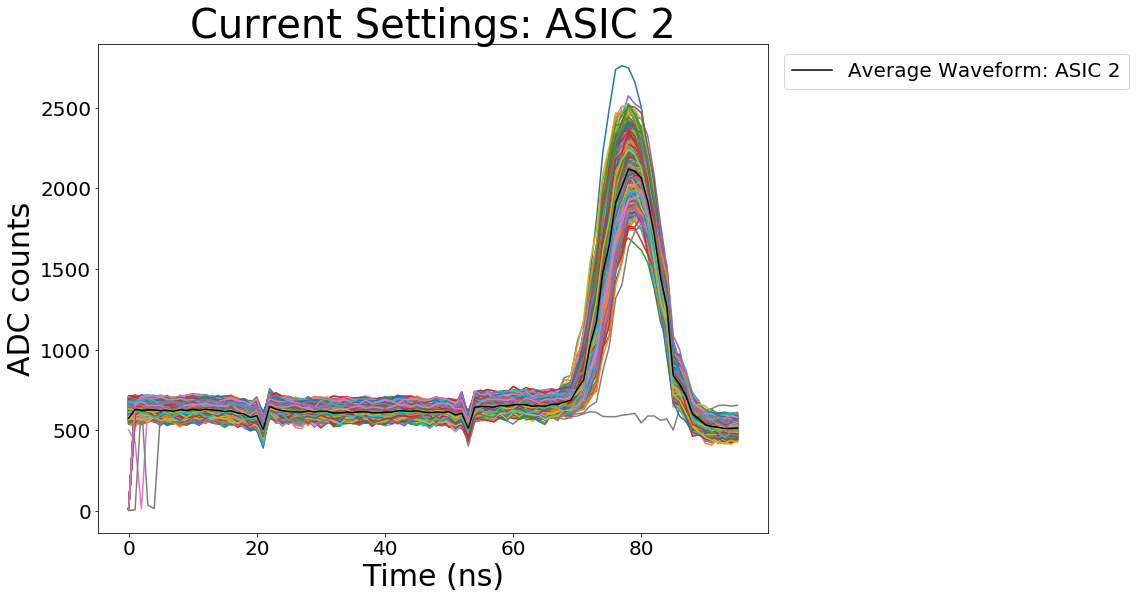

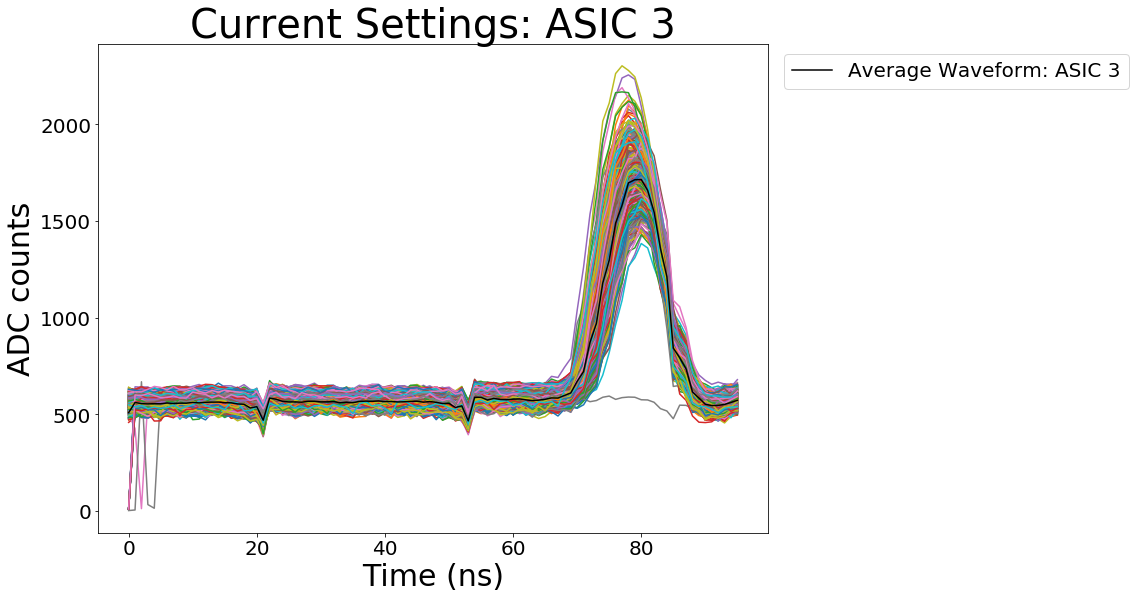

In [16]:
# Compare the best setting with the current setting
# Plot individual and average waveforms for Current Settings (Even blocks only)

current = []
for ASIC in range(4):
    data = np.loadtxt("/users/wipacuser/Desktop/CTA/Runs/ASIC Initialization Scans/STRB2 Location/sampleFileLarge_run320342ASIC" + str(ASIC) + "CH6.txt") 
    waveforms = []
    for event in range(5000):
        phase = int(data[event][4])
        shift = 32 - phase - 1 + 16*(phase>=16) - 16*(phase<16)
        block = int(data[event][3])
        r = block//64
        c = block%64
        block = 8*c + r
        if block%2==0:
            waveforms.append(data[event][shift: shift+96])

    avg_waveform = []
    for point in range(96):
        a = []
        for event in range(len(waveforms)):
            a.append(waveforms[event][point])
        avg_waveform.append(np.mean(a))
    current.append(avg_waveform)
        
    for event in range (500):
        plt.plot(waveforms[event])
    plt.plot(avg_waveform, label = 'Average Waveform: ASIC ' + str(ASIC), color = 'black')
    plt.title('Current Settings: ASIC ' + str(ASIC))
    plt.ylabel('ADC counts')
    plt.xlabel('Time (ns)')
    plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
    plt.show()

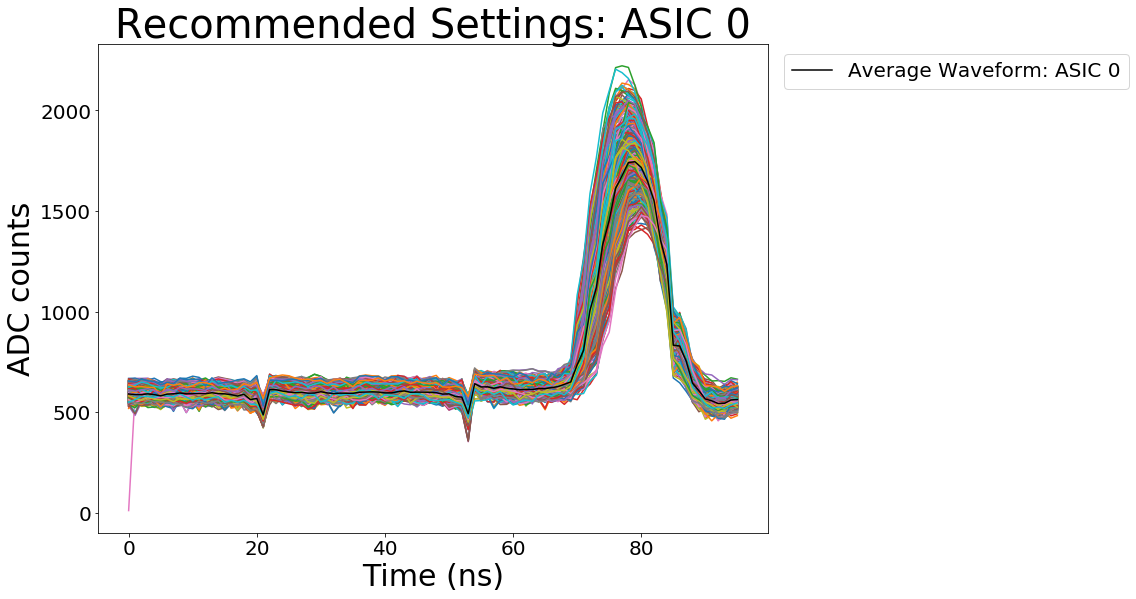

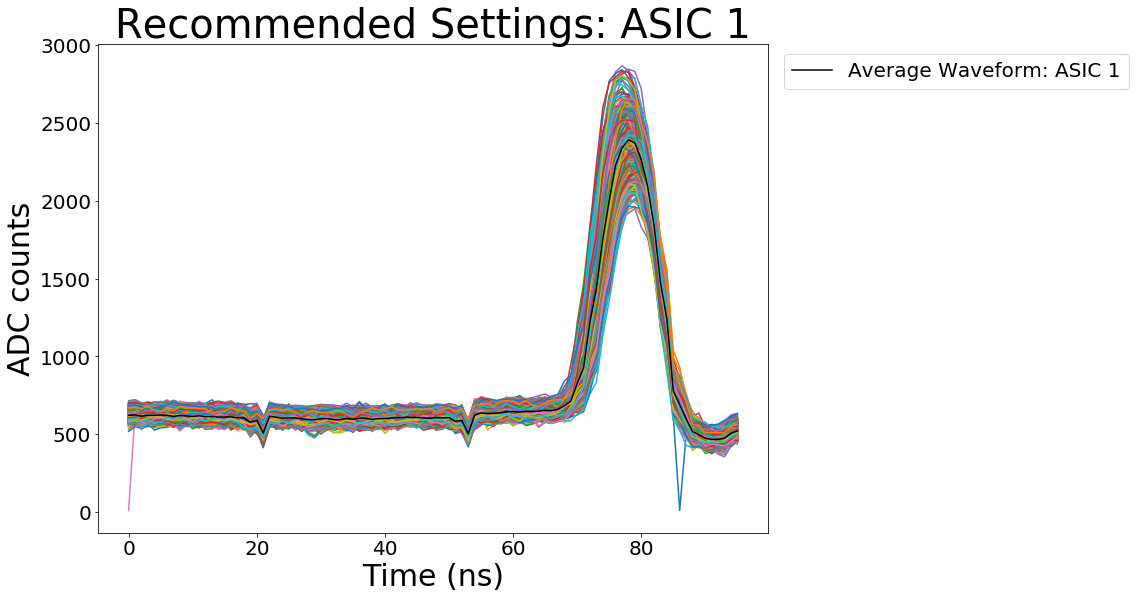

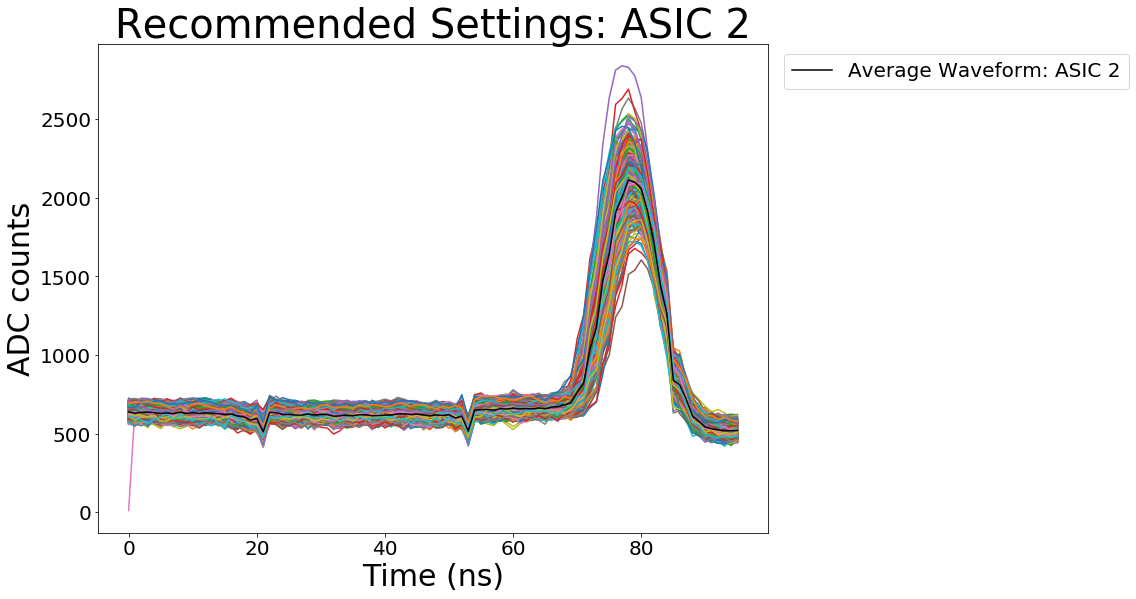

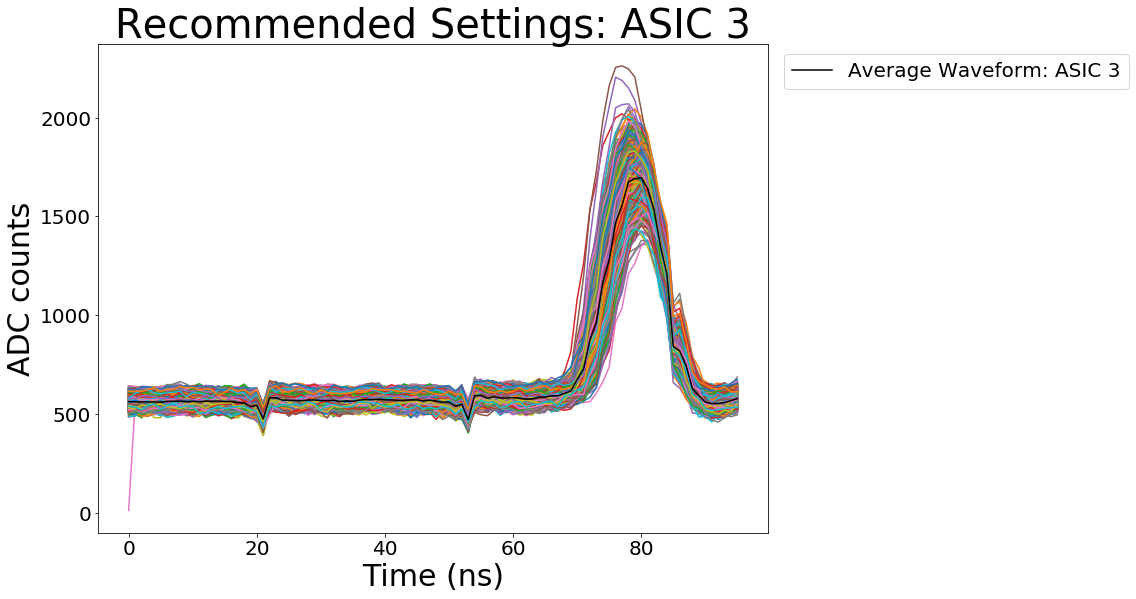

In [17]:
# Compare the best setting with the current setting
# Plot individual and average waveforms for Best Settings

best = []
for ASIC in range(4):
    data = np.loadtxt("/users/wipacuser/Desktop/CTA/Runs/ASIC Initialization Scans/STRB2 Location/sampleFileLarge_run320340ASIC" + str(ASIC) + "CH6.txt") 
    waveforms = []
    for event in range(5000):
        phase = int(data[event][4])
        shift = 32 - phase - 1 + 16*(phase>=16) - 16*(phase<16)
        block = int(data[event][3])
        r = block//64
        c = block%64
        block = 8*c + r
        if block%2==0:
            waveforms.append(data[event][shift: shift+96])

    avg_waveform = []
    for point in range(96):
        a = []
        for event in range(len(waveforms)):
            a.append(waveforms[event][point])
        avg_waveform.append(np.mean(a))
    best.append(avg_waveform)
        
    for event in range (500):
        plt.plot(waveforms[event])
    plt.plot(avg_waveform, label = 'Average Waveform: ASIC ' + str(ASIC), color = 'black')
    plt.title('Recommended Settings: ASIC ' + str(ASIC))
    plt.ylabel('ADC counts')
    plt.xlabel('Time (ns)')
    plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
    plt.show()

In [18]:
print(shape(current))
print(shape(best))

(4, 96)
(4, 96)


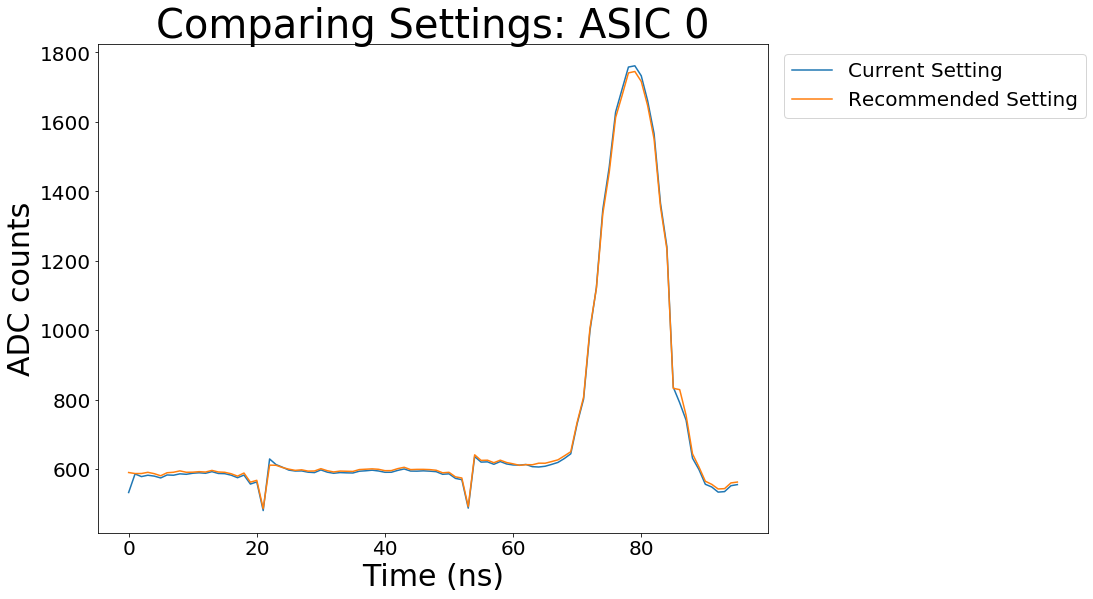

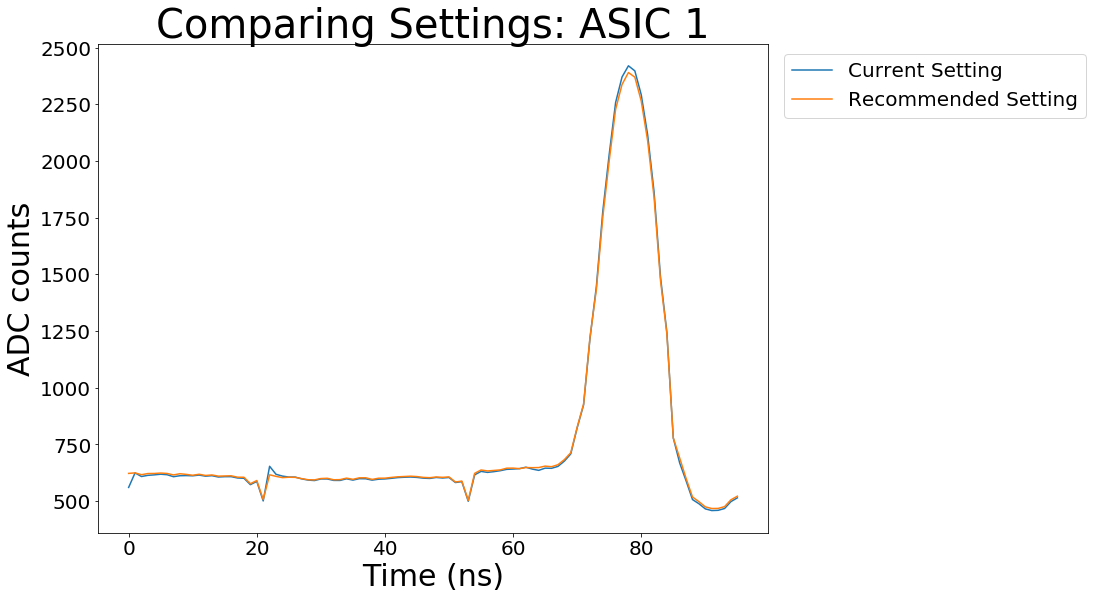

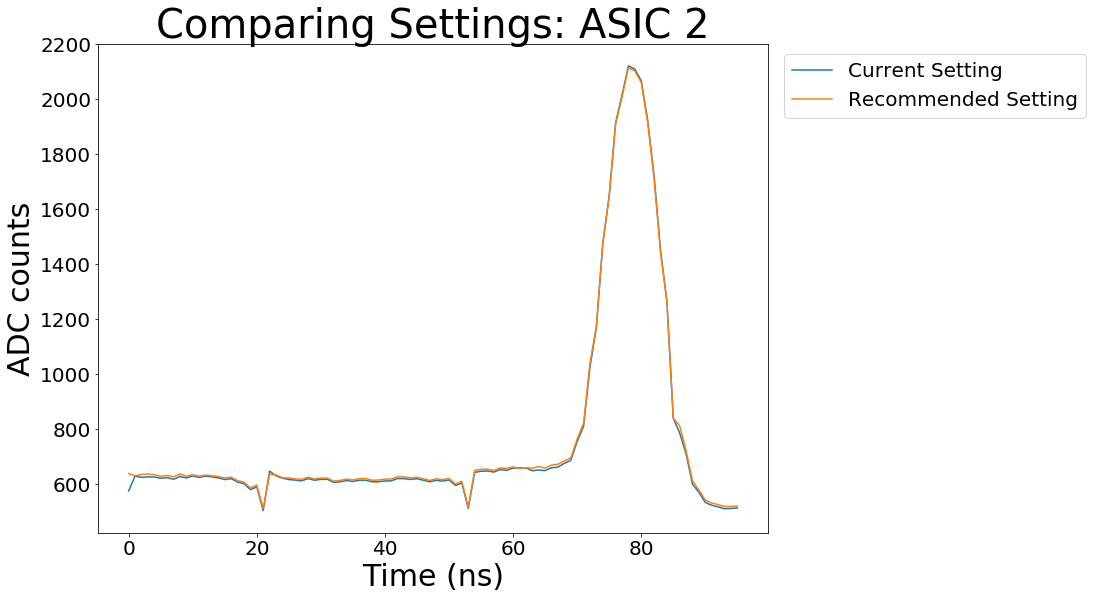

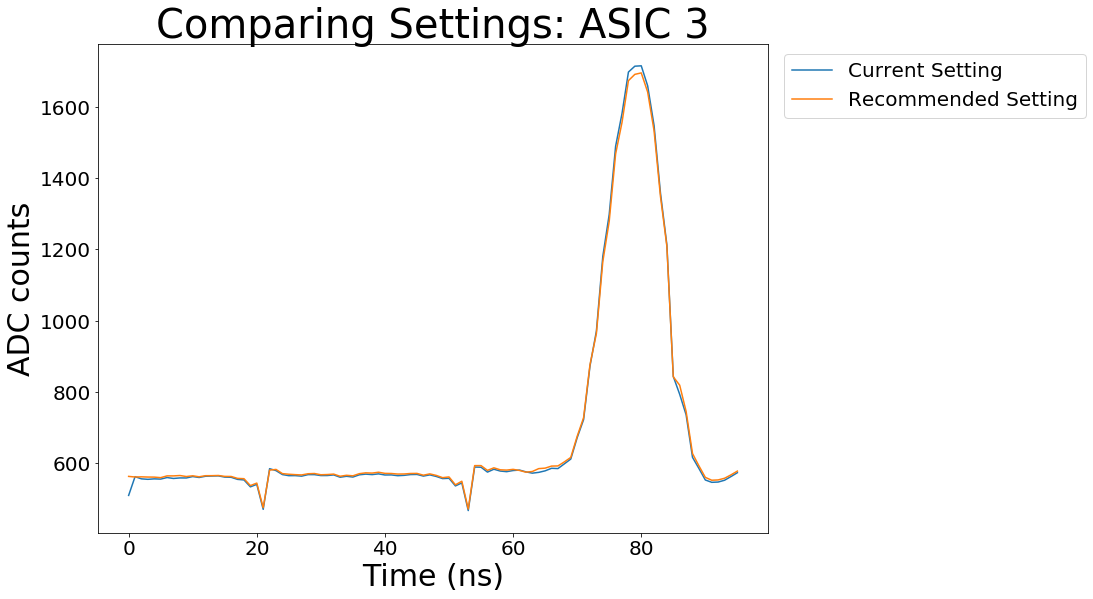

In [19]:
# Compare the best setting with the current setting
# Plot average waveforms for current and best settings

for ASIC in range(4):
    plt.plot(current[ASIC], label = 'Current Setting')
    plt.plot(best[ASIC], label = 'Recommended Setting')
    plt.title('Comparing Settings: ASIC ' + str(ASIC))
    plt.ylabel('ADC counts')
    plt.xlabel('Time (ns)')
    plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
    plt.show()

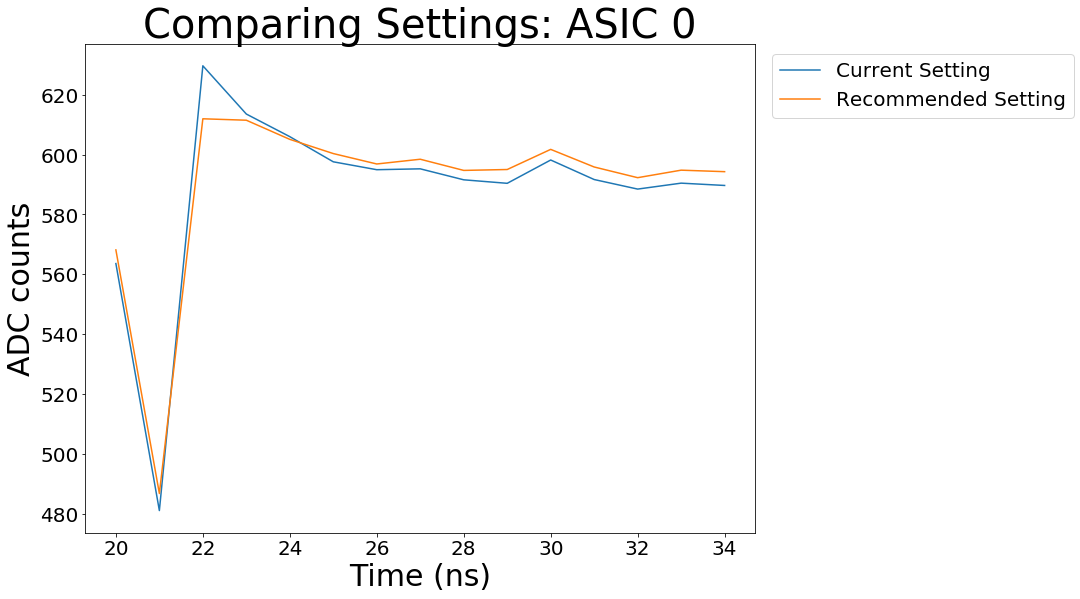

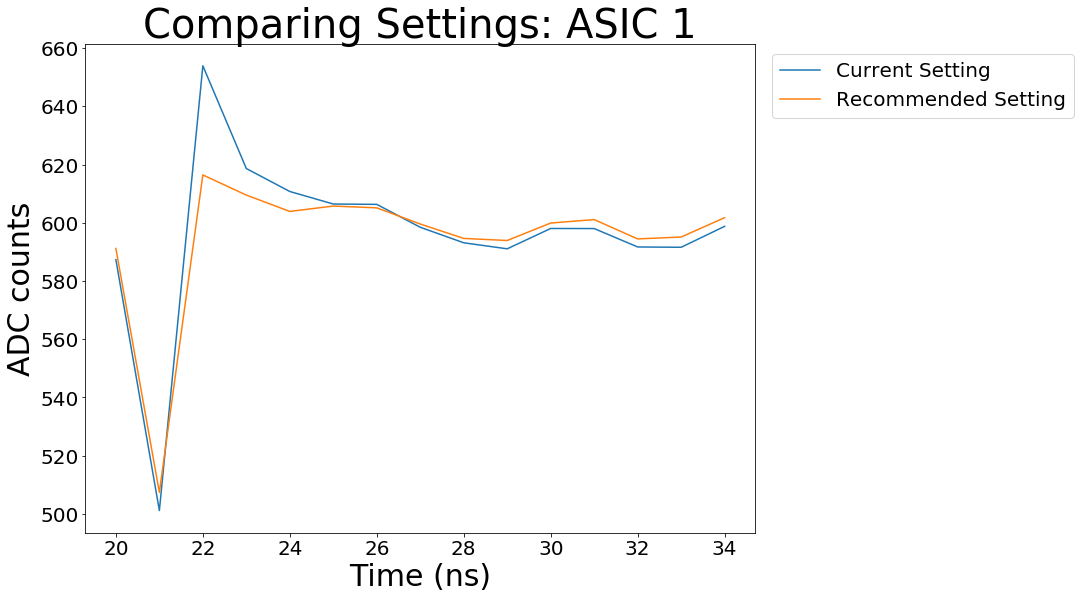

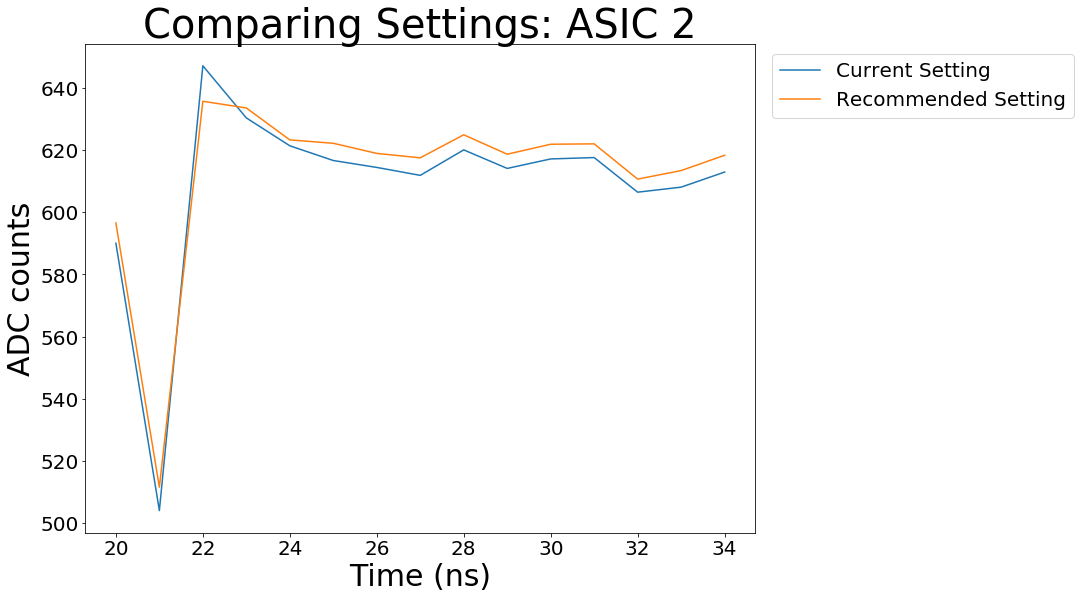

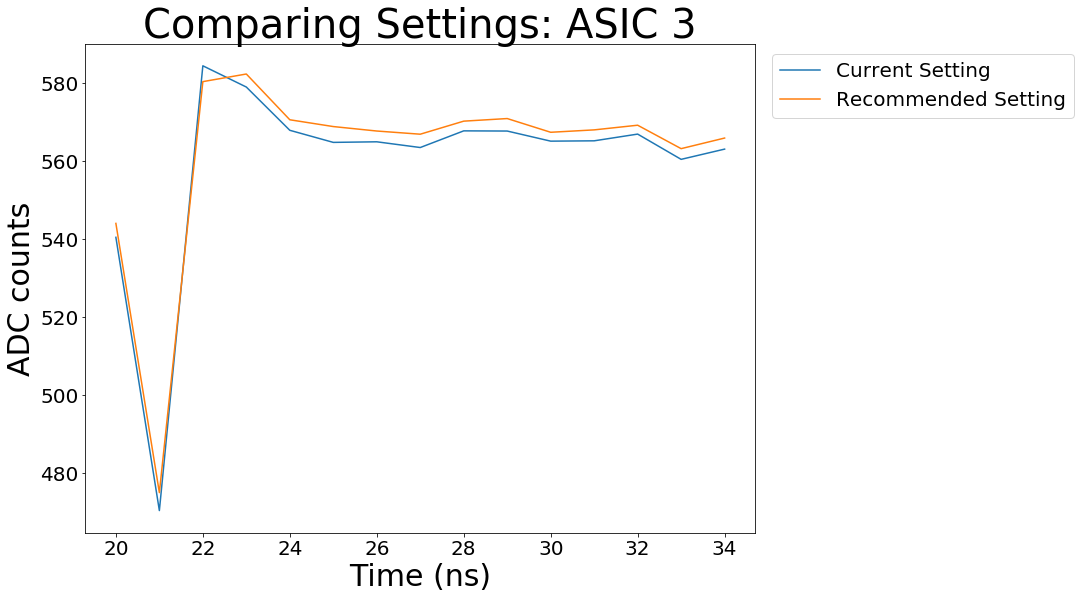

In [20]:
# Compare the best setting with the current setting
# Plot average waveforms for current and best settings (Zoomed in)

x = [i for i in range(20,35)]
for ASIC in range(4):
    plt.plot(x, current[ASIC][20:35], label = 'Current Setting')
    plt.plot(x, best[ASIC][20:35], label = 'Recommended Setting')
    plt.title('Comparing Settings: ASIC ' + str(ASIC))
    plt.ylabel('ADC counts')
    plt.xlabel('Time (ns)')
    plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
    plt.show()